**1 ) TITLE OF THIS PROJECT**

  "**Optimizing Bank Marketing Campaigns**

    NAME : TONCY JOSEPH

    ORGANIZATION : ENTRI ELEVATE**

    DATE : 20/9/2024




**2)  Overview of Problem Statement**

    In the banking sector, direct marketing campaignS are a key method for

    promoting financial products, particularly term deposits. These campaigns

    rely heavily on phone calls to engage with potential customers. However,
     
    predicting which clients will subscribe to a term deposit after a
      
    marketing campaign remains a significant challenge. Customer decisions
      
    are influenced by a variety of factors, including their demographics,
       
    financial circumstances, and past interactions with the bank.

**3 ) Objective**


    To address this challenge, this project aims to develop a predictive
    
    machine learning model using data from a Portuguese banking institution

    The dataset, collected between May 2008 and November 2010, contains
     
    detailed information from various direct marketing campaigns. It includes
     
    attributes such as the customer’s age, job, marital status, education
      
    level, and financial history, as well as details about the marketing
      
    efforts, such as the number and outcome of previous contacts.

    With a dataset that encompasses over 41,000 observations and 20 features,
    
    this project will focus on identifying patterns and trends to predict
     
    whether a customer will subscribe to a term deposit. By leveraging machine
     
    learning algorithms, the goal is to improve the bank's ability to target
     
    potential customers, optimize marketing resources, and increase campaign
      
    success rates.

**4 )  Data Description**

    Source

        UCI Machine Learning Repository - Bank Marketing Dataset

        [https://archive.ics.uci.edu/dataset/222/bank+marketing]

**Features**

    bank client data

    1 - age (numeric)

    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

    4 - education (categorical: "unknown","secondary","primary","tertiary")

    5 - default: has credit in default? (binary: "yes","no")

    6 - balance: average yearly balance, in euros (numeric)

    7 - housing: has housing loan? (binary: "yes","no")

    8 - loan: has personal loan? (binary: "yes","no")

    # related with the last contact of the current campaign:

    9 - contact: contact communication type (categorical: "unknown","telephone",
    "cellular")

    10 - day: last contact day of the month (numeric)

    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

    12 - duration: last contact duration, in seconds (numeric)

    # other attributes:

    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

    Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")



**Dataset Files**

    bank.zip
    bank-additional.zip

**Data Collection**

**importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### **loading dataset**

In [ ]:
df = pd.read_csv('/content/bank-full.csv', sep=';')


### **printing first 10 rows of the dataseT**

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


    this dataset helps analyze the success of bank marketing campaigns and
    
    explore patterns in customer behavior, which can be leveraged for decision-making in future campaigns.

**Rename the 'y' column to 'subscription**

In [ ]:
df.rename(columns={'y': 'subscription'}, inplace=True)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription'],
      dtype='object')

**Data** **Preprocessing**

**printing shape&size of the dataset**

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.size

768587

**data types of each column in your dataset**

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


**observation**

    int64: Columns like age, balance,day, duration,campaign,pdays,previous
    hold numerical data, specifically integers.

    object: Columns like job, marital, education,default,housing,loan,contact,
    
    month,poutcome, hold categorical or textual data (strings).

**summary statistics for the numerical columns**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**check null values**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


 **Find** **Features** **with** **One** **Value**

In [ ]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
subscription 2


age (77 unique values)

    age column has a wide range of age values, making it a continuous variable.

job (12 unique values)

    This column represents different job types. It’s a categorical variable with 12 distinct job categories.

marital (3 unique values)

    This column has three marital status categories (e.g., single, married, divorced).


education (4 unique values)

    Represents different education levels with four distinct categories.


default (2 unique values)

    This is a binary categorical variable (e.g., whether a client has credit in default or not).

balance (7168 unique values)

    This is a continuous variable with a broad range of values, likely representing the client’s account balance.


housing (2 unique values)

    A binary categorical variable (e.g., whether the client has a housing loan or not).

loan (2 unique values)

    Another binary categorical variable (e.g., whether the client has a personal loan or not).


contact (3 unique values)

    Represents the type of communication used for contact (e.g., cellular, telephone).


day (31 unique values)

    Likely represents the day of the month for some activity, so it has 31 possible values.


month (12 unique values)

    Represents months of the year, with 12 possible values.


duration (1573 unique values)

    This is a continuous variable, probably representing the duration of a contact or call, with a large range of values.


campaign (48 unique values)

    Represents the number of contacts performed during this campaign, so it has many unique values.

pdays (559 unique values)

    Represents the number of days since the client was last contacted from a previous campaign. It has a large number of unique values.

previous (41 unique values)

    Represents the number of contacts performed before this campaign. It’s a variable with many possible values.

poutcome (4 unique values)

    Represents the outcome of a previous marketing campaign with four distinct categories.

subscription (2 unique values)  

    This is the target variable with two categories (e.g., whether the client subscribed to a term deposit or not).

**EDA**

**printing categorical columns**

In [ ]:
categorical = [var for var in df.columns if df[var].dtype == "O"]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscription']

**print** **few** **rows** **of** **the** **categorical** **columns**

In [ ]:
# Define the categorical columns
categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'poutcome', 'subscription'
]

df[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


**quickly** **identify** **the** **number** **of** **distinct** **categories** **for** **each** **categorical** **feature**

In [ ]:
for feature in categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is subscription and number of categories are 2


    there are 10 categorical features

    feature job and month has highest number of categorical values

**Plotting all categorical variables with different colors**

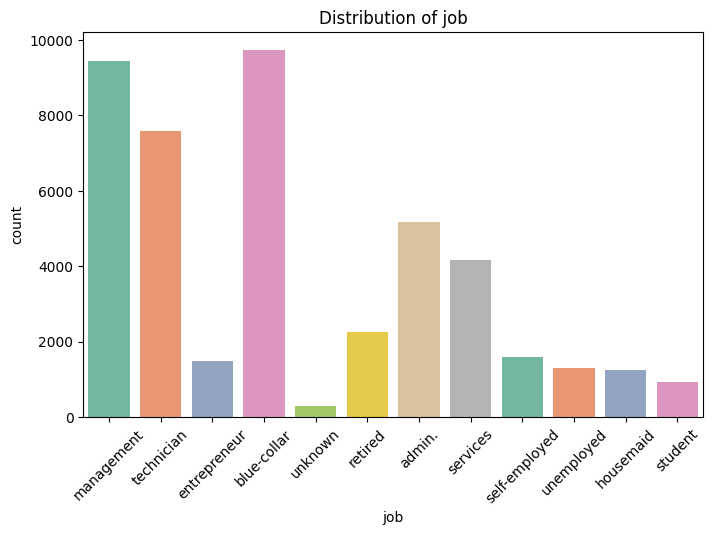

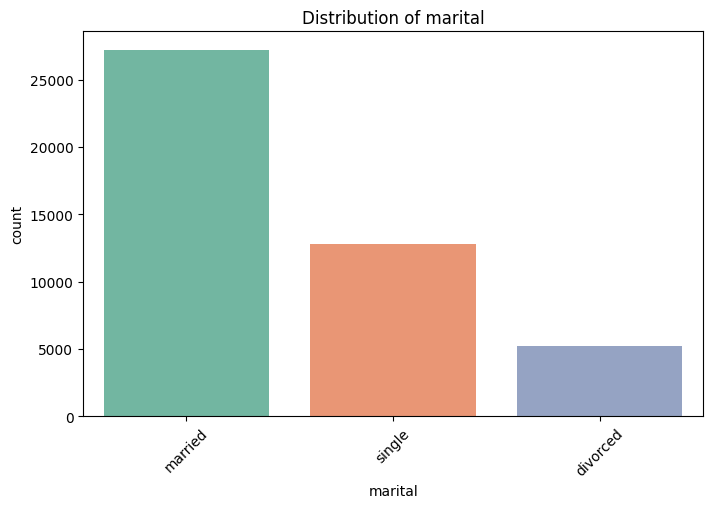

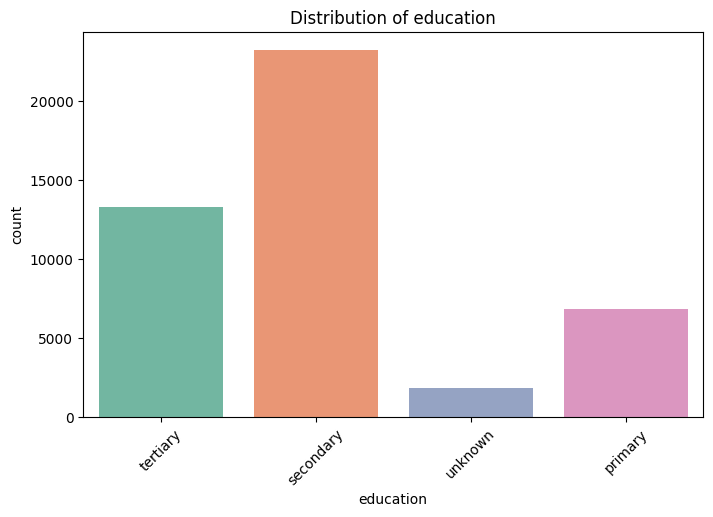

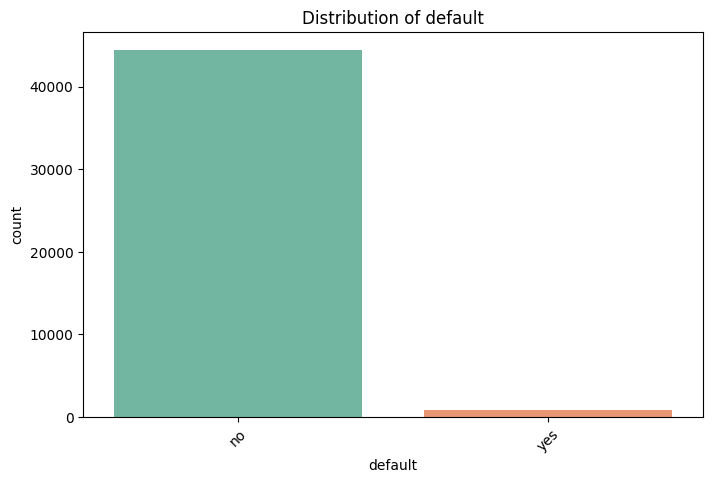

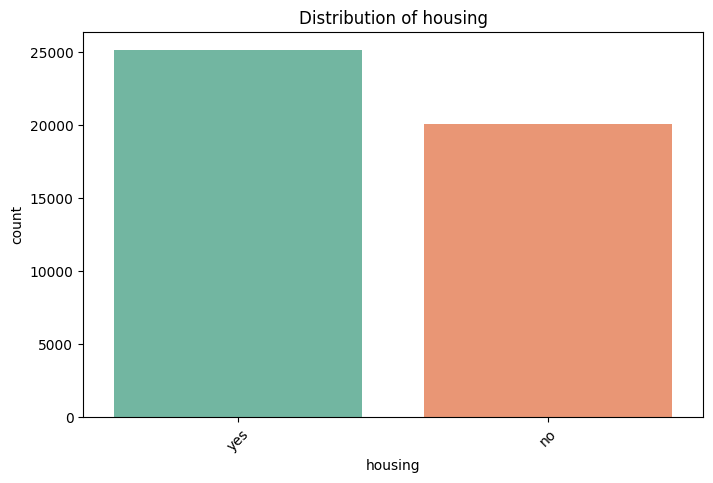

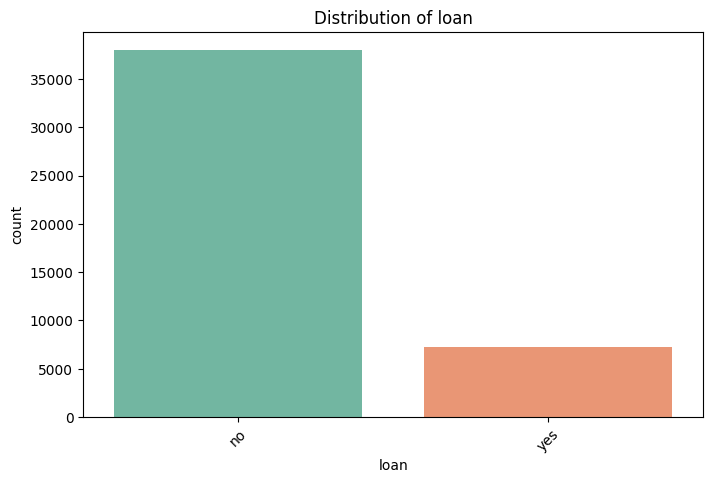

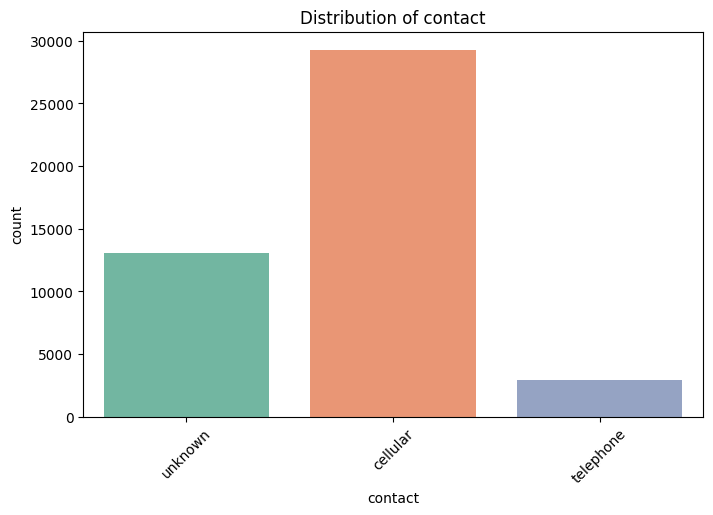

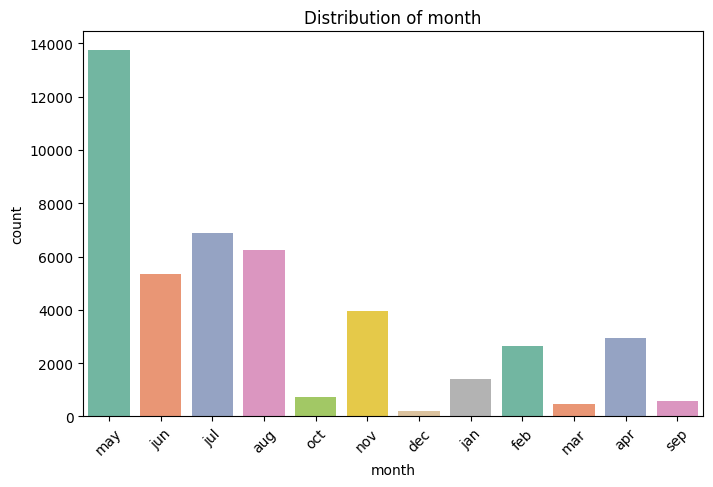

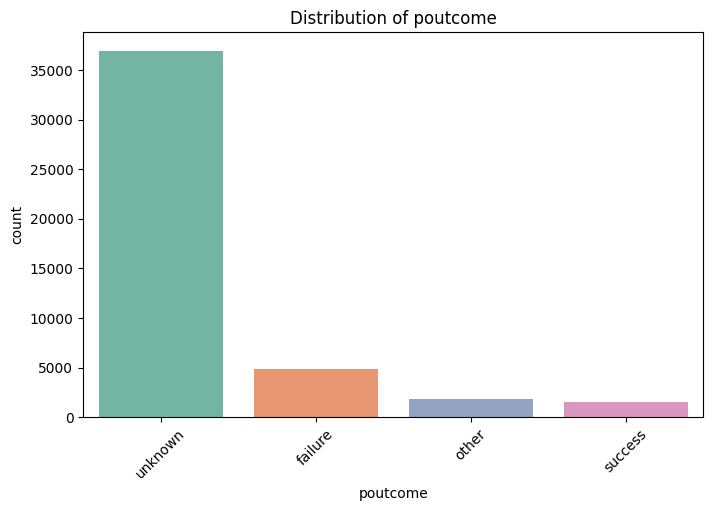

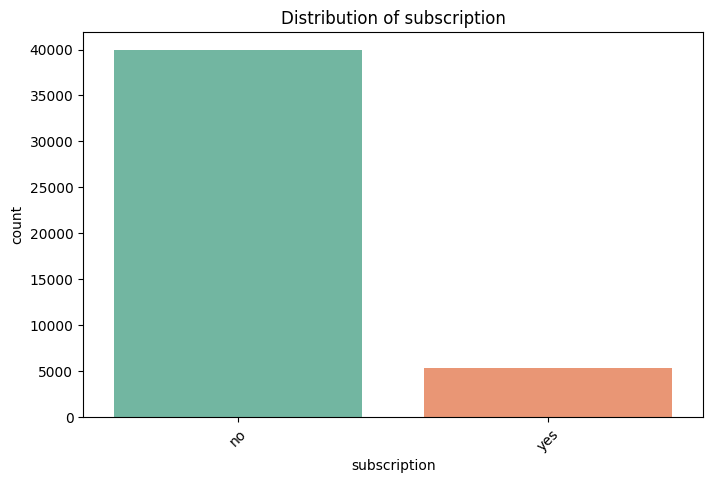

In [ ]:
# Import seaborn's color palette
palette = sns.color_palette("Set2")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette=palette)  # Apply the color palette
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Observations**

  job (Type of Job):

    likely observed that the majority of clients fall into job categories such
   
    as "blue-collar," "management," and "technician." Job types like "student,"
    
    "housemaid," and "unemployed" may be underrepresented.


  Insight:


    This suggests that the bank's marketing campaign targets people in
    
    professional or blue-collar jobs more than students or retired individuals.
    
    Job category imbalance may also influence the model, so this could be
    
    relevant for feature engineering.


   Marital Status

    Most clients are "married," followed by "single" and "divorced"
    (which includes widowed individuals).

   Insight:
   
    Married individuals might be more inclined to make long-term
    
    financial commitments, such as subscribing to a term deposit, which could
    
    be a factor when modeling the likelihood of a subscription. A relatively
    
    small number of "divorced" individuals might suggest less engagement in
    
    term deposit products

    .
  Education Level

    Clients with "university.degree" and "high.school" education are likely the
    
    majority, while fewer clients have "basic.4y" or "illiterate" education.


 Insight

    A higher level of education might correlate with better financial literacy,
    
    potentially influencing the likelihood of subscribing to a term deposit.
     
    A strong skew towards university-educated clients suggests a more financially aware customer base.


  default (Has Credit in Default)

    The vast majority of clients likely have no credit in default ("no"), while
    
    only a small proportion has credit in default ("yes").

    Insight: Since most clients do not have credit in default, this feature may
    
    not be very predictive in distinguishing between those who subscribe to
    
    term deposits. However, defaulted clients may be risk-averse and less likely to subscribe

    
  housing (Has Housing Loan):

    Distribution Observation: A large proportion of clients likely have a
    
    housing loan ("yes"), with fewer clients not having one ("no").

    Insight: Housing loans may indicate more financially committed clients, but
    
    it could also mean they are less likely to invest in additional financial
    
    products, such as term deposits, due to existing financial obligations


   loan (Has Personal Loan):

    Similar to housing, the majority of clients might not have a personal loan
    
    ("no"), and only a small portion has one ("yes")

  Insight:

    Clients without personal loans might have more financial flexibility,
    
    making them more inclined to subscribe to a term deposit. Those with
    
    personal loans could be more risk-averse


  contact (Contact Communication Type):

    Distribution Observation: Most clients are likely contacted via "cellular,"
    
    with fewer contacted by "telephone."

  Insight:

    Cellular contacts might reflect modern communication preferences and could
    
    suggest that clients contacted via mobile may have a higher engagement
    
    level. A smaller share of clients contacted via telephone could imply lower response rates from these customers


  month (Last Contact Month)

    Certain months may have a higher frequency of contacts (e.g., "may" or
    
    "august"), while other months (like "december" or "november") may have fewer.

  Insight:
    
    Seasonality could affect customer engagement with marketing campaigns. For
    
    instance, clients contacted in certain months might be more likely to
    
    subscribe to a term deposit, perhaps due to seasonal financial planning or bonuses.


  poutcome (Outcome of Previous Marketing Campaign):

    Most clients probably fall under the "unknown" category, meaning they were
    
    not part of previous campaigns. "Failure" could be the next most common, with "success" being less frequent.

  Insight:
    
    Clients with a previous "success" outcome may be more likely to subscribe
    
    again, while those with "failure" or "unknown" outcomes might be less engaged.


  subscription (Target Variable – Subscribed to Term Deposit)


    observe an imbalance in the target variable, with more clients having "no"
    
    as the outcome (not subscribed) than "yes" (subscribed).
    

   Insight:
    
    The class imbalance in the target variable indicates that the dataset is
    
    skewed towards clients who did not subscribe to a term deposit.

    
    
    




**Pie** **Diagram** **subscripition** **proportion**

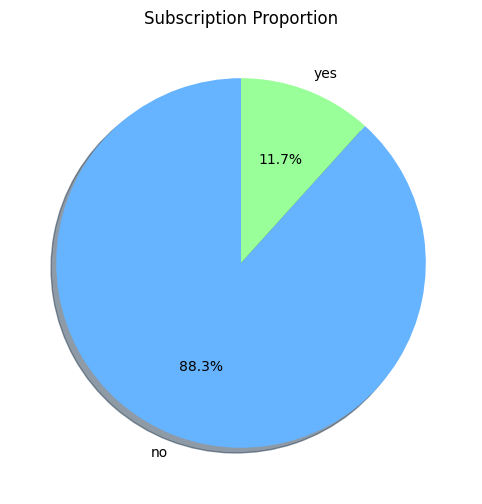

In [ ]:
      plt.figure(figsize=(8, 6))
df['subscription'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90, shadow=True)
plt.title('Subscription Proportion')
plt.ylabel('')
plt.show()

**find** **the** **relationship** **between** **categorical** **features** **and** **target** **variable**(subscription)

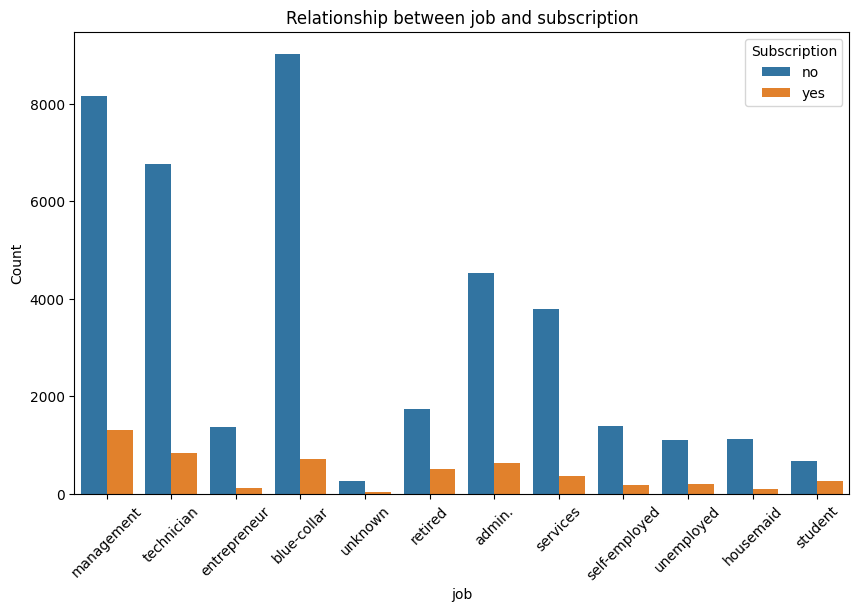

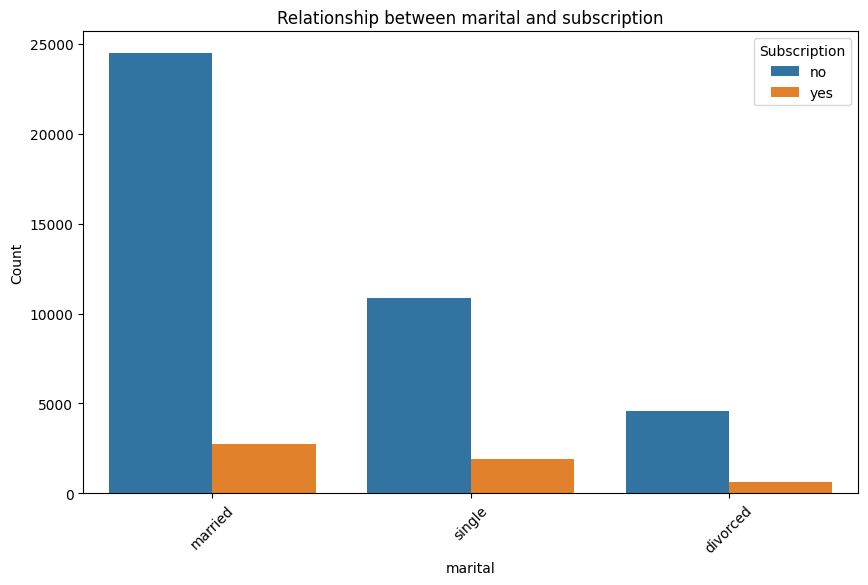

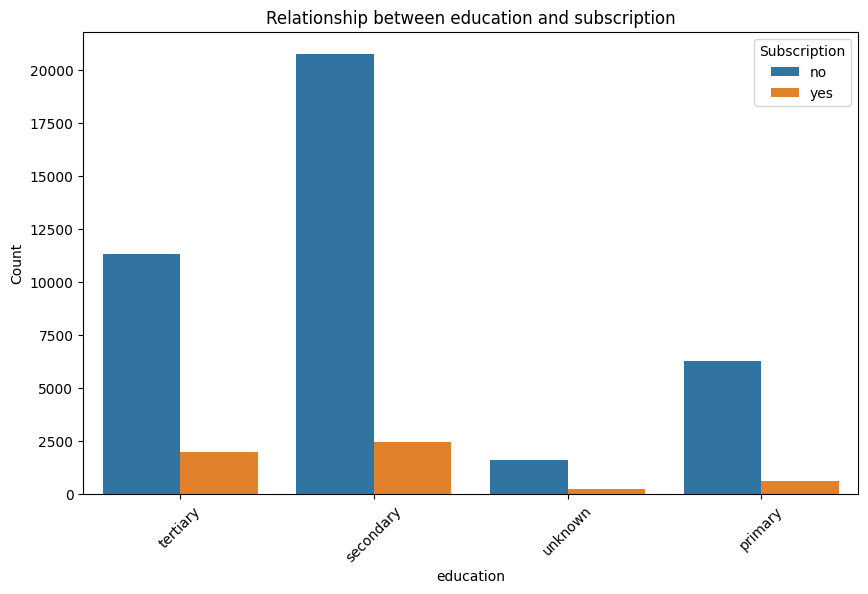

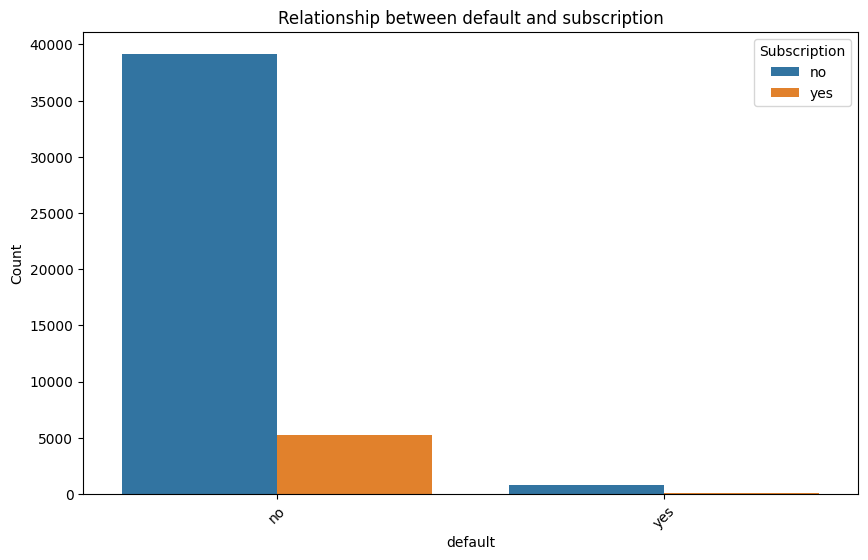

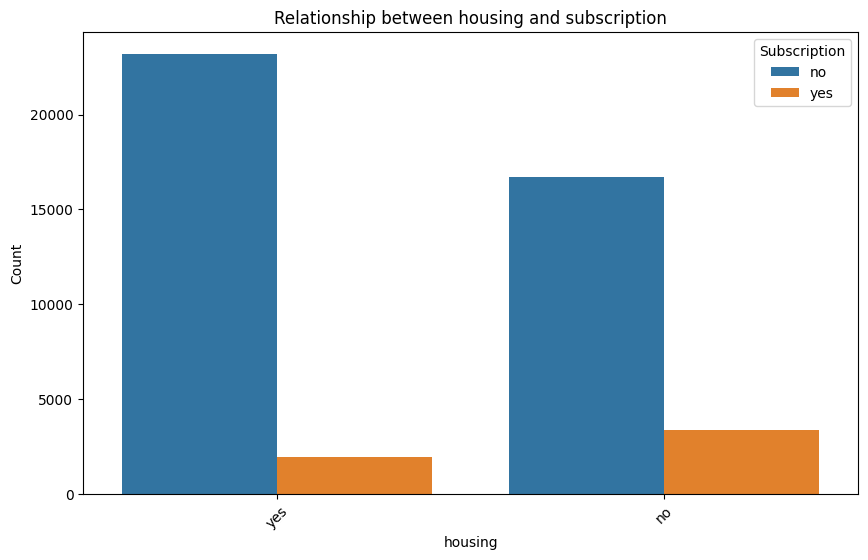

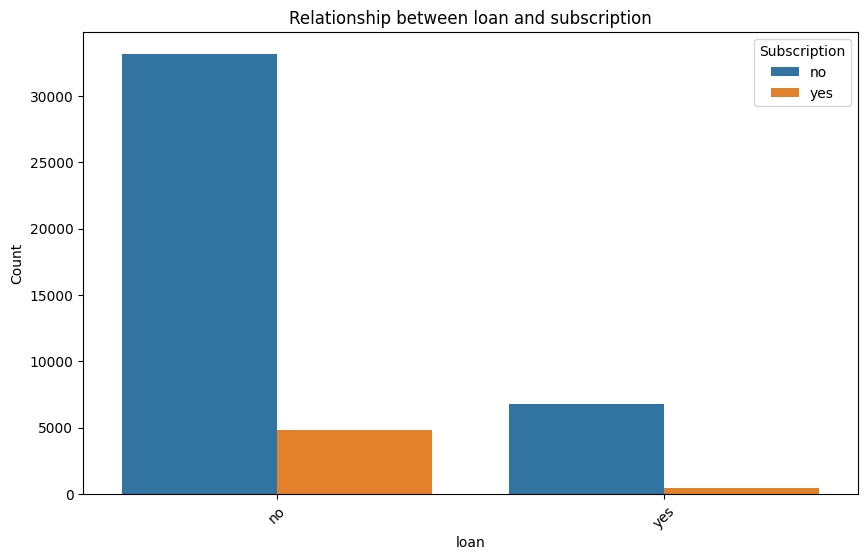

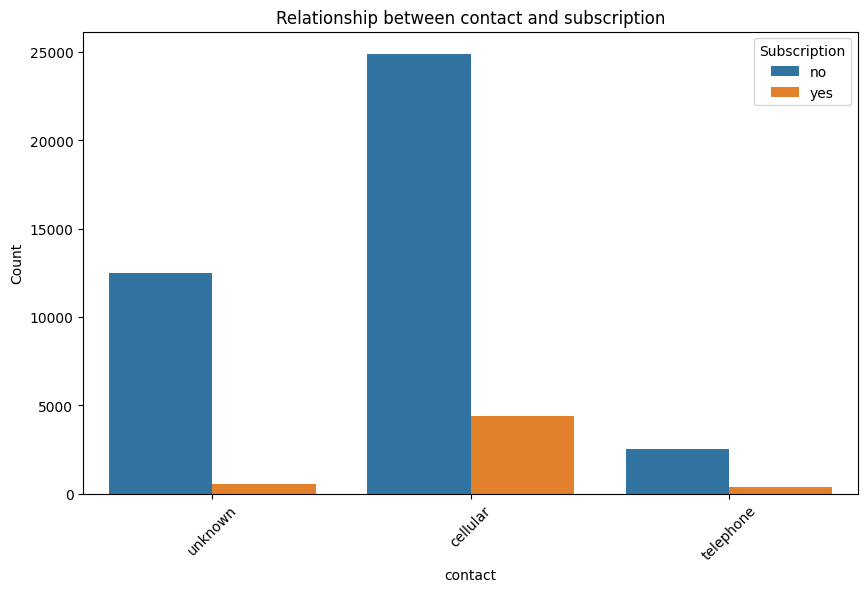

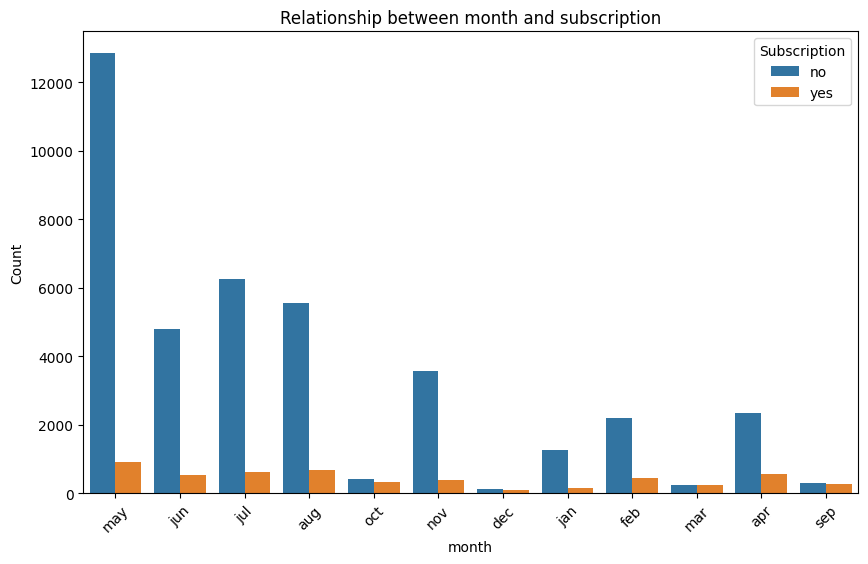

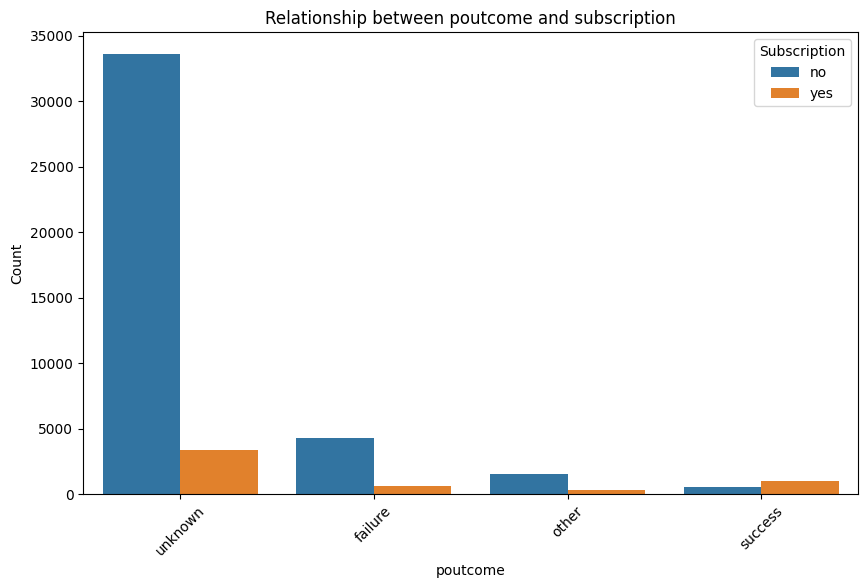

In [ ]:


# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Iterate over each categorical feature and create a count plot split by the target variable
for categorical_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_feature, hue='subscription', data=df)
    plt.title(f'Relationship between {categorical_feature} and subscription')
    plt.xticks(rotation=45)
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.legend(title='Subscription')
    plt.show()


**Check** **counts** **of** **target** **variable** **split** **by** **each** **categorical** **feature**

In [ ]:

for categorical_feature in categorical_features:
    print(f"Counts of target variable split by {categorical_feature}:")
    counts = df.groupby([categorical_feature, 'subscription']).size().unstack().fillna(0)
    print(counts)
    print()

Counts of target variable split by job:
subscription     no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Counts of target variable split by marital:
subscription     no   yes
marital                  
divorced       4585   622
married       24459  2755
single        10878  1912

Counts of target variable split by education:
subscription     no   yes
education                
primary        6260   591
secondary     20752  2450
tertiary      11305  1996
unknown        1605   252

Counts of target variable split by default:
subscription     no   yes
default                  
no            39159  5237
yes             763    52

Counts of target variable split by housing:
subscription     no   ye

 **Explore** **the** **Numerical** **Features**

In [ ]:

numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**Find** **Discrete** **Numerical** **Features**

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Plotting** **histograms** **for** **numerical** **variables**

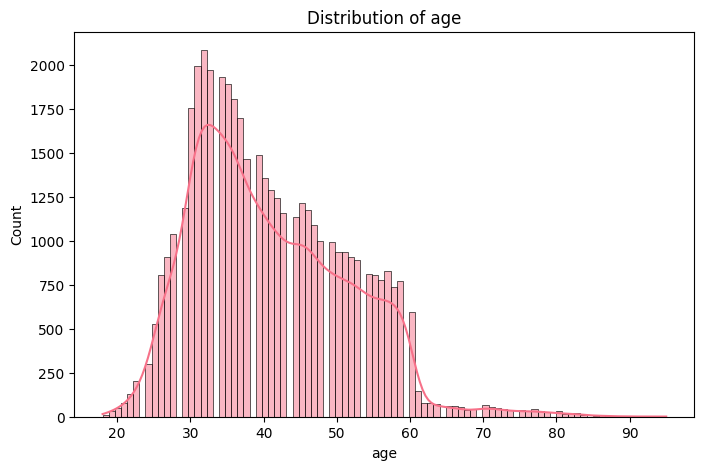

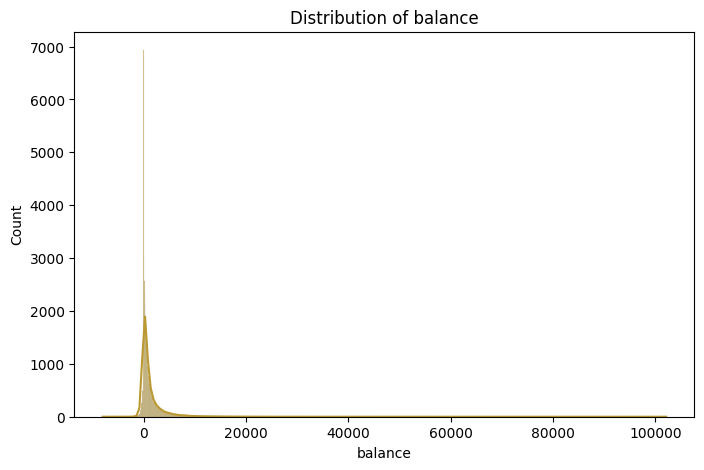

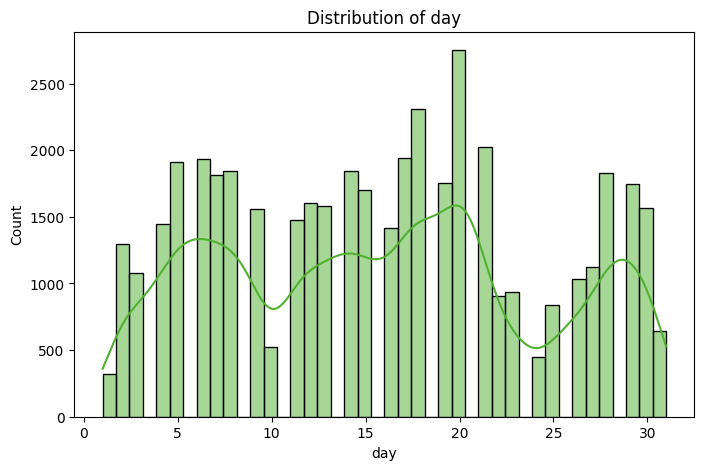

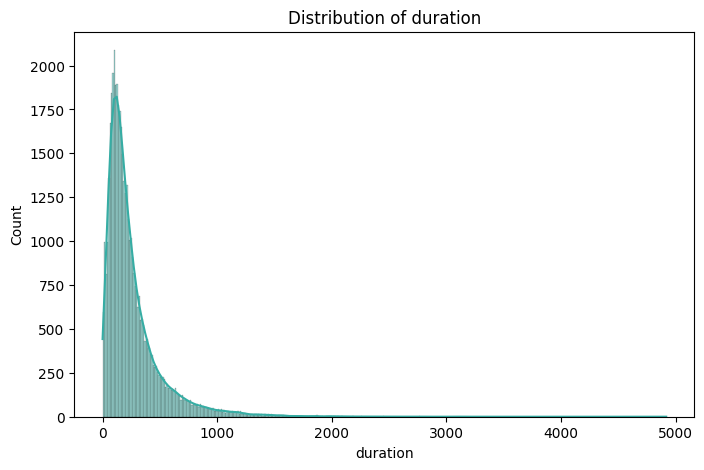

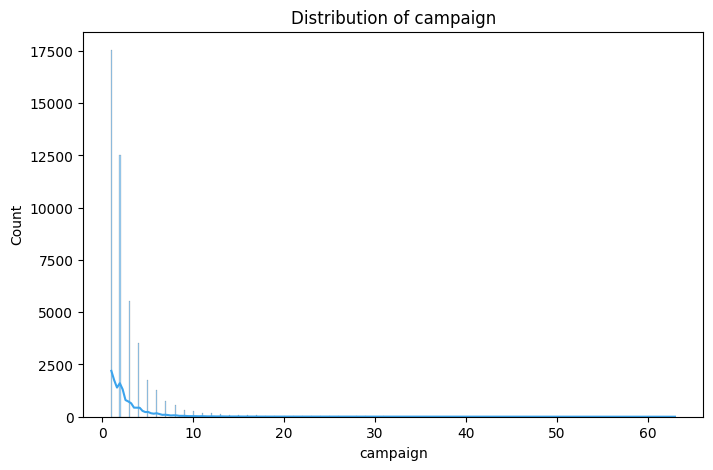

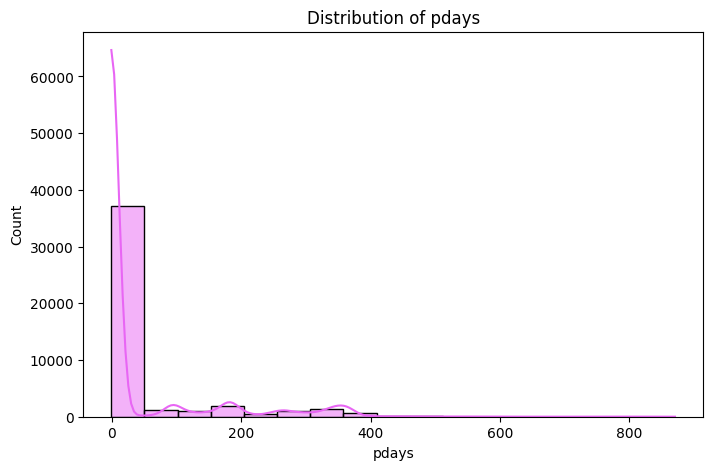

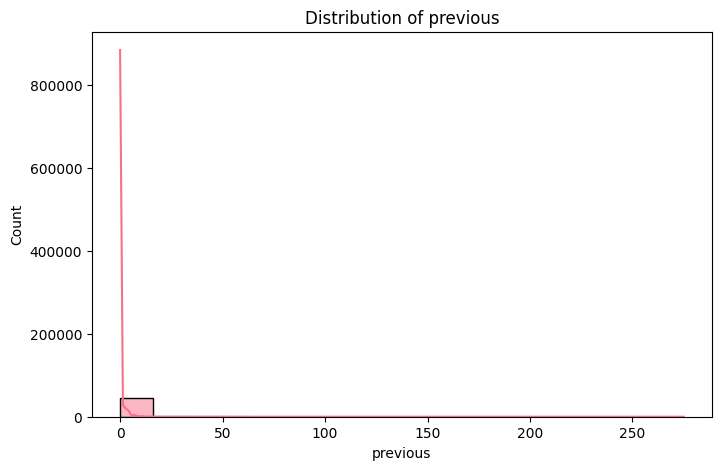

In [ ]:
# Using a Seaborn color palette

palette = sns.color_palette("husl")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)])
    plt.title(f'Distribution of {col}')
    plt.show()

**age**

    The age distribution might show a bell curve, with most clients
    
    concentrated between 30 and 60 years old. There could be fewer younger
    
    clients (below 20) and older clients (above 70).


**insight**

    This suggests the target audience for the bank's marketing campaign is
    
    middle-aged individuals, which is typical for financial products like term
     
    deposits. Understanding how different age groups respond to the campaign
      
    might help optimize the model.


**balance** (Average Yearly Balance in Euros)

    The balance distribution might be right-skewed, with a long tail of
     
    clients having very high balances. Most clients likely have a balance
      
    closer to 0, while fewer clients have large savings.



**Insight**:

    This skewed distribution indicates that the majority of clients maintain
    
    relatively modest balances, and only a small subset of wealthy clients has
     
    much higher balances. Wealthier clients might be more likely to invest in
      
    term deposits, but the model will need to account for this skew.


**day** (Day of the Month for the Last Contact)

    observe an approximately uniform distribution, as clients are contacted
    
    fairly evenly throughout the month, with no specific day standing out.


**Insight**:

    This suggests that the bank's marketing efforts were distributed fairly
    
    evenly across the month, with no specific day having a significant effect on customer engagement.


**campaign** (Number of Contacts Performed During the Campaign):

    The distribution of the campaign variable might be highly skewed, with most
    
    clients having only 1 or 2 contacts, and fewer clients being contacted
     
    more than 5 times.


**Insight**:

    A small number of contacts is typical for a marketing campaign, and clients
    
    who are contacted more frequently might have already shown interest.
     
    However, repeated contacts may indicate lower responsiveness or even
     
    annoyance, which could affect the likelihood of a term deposit
     
    subscription.


**pdays** (Number of Days Since Last Contact from a Previous Campaign)

    This variable could show a sharp peak at -1, indicating that many clients
    
    have not been previously contacted. For other clients, the distribution may
    
    be more spread out with a long tail.




**Insight**

    The peak at -1 highlights that most clients were new to the campaign and
    
    were not previously contacted. This could have a significant impact on
    
    their likelihood of subscribing to the term deposit, as first-time contact
    
    may have different results than follow-ups.


**previous** (Number of Contacts from Previous Campaigns)


    The previous variable is likely skewed towards 0, with most clients not
    
    being contacted in previous campaigns. A small number of clients may have
   
    multiple previous contacts.




**Insight**

    The fact that most clients were not part of previous campaigns suggests
    
    that the marketing campaign is reaching many new clients. Clients with more
   
    previous contacts could show different behavior in terms of subscribing.


**duration** (Last Contact Duration in Seconds):

    
    The duration variable is typically right-skewed, with many short calls and
    
    a few longer ones. Shorter calls might dominate the distribution, with a
    
    long tail for the longer durations.


**Insight**

    Call duration is a critical variable, as longer calls likely indicate more
    
    engagement and a higher chance of subscription. The large number of short
     
    calls may include uninterested or unavailable clients, while longer calls could correlate with successful outcomes.






     
   


    




 **boxplots** **for** **each** **numerical** **feature** **against** **subscription**

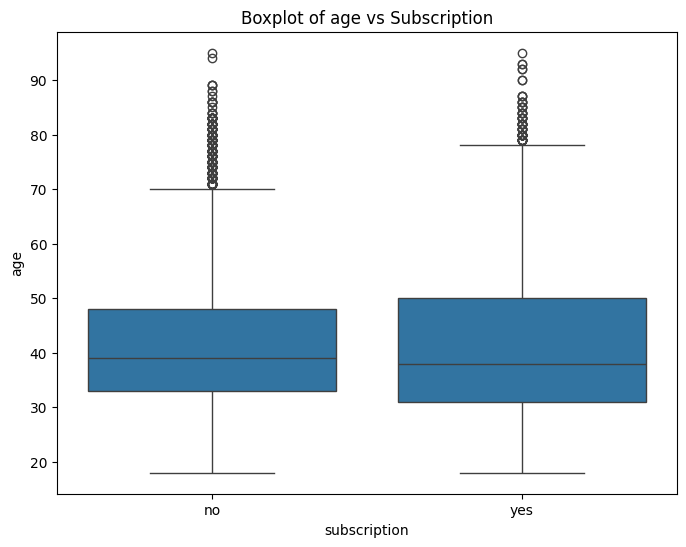

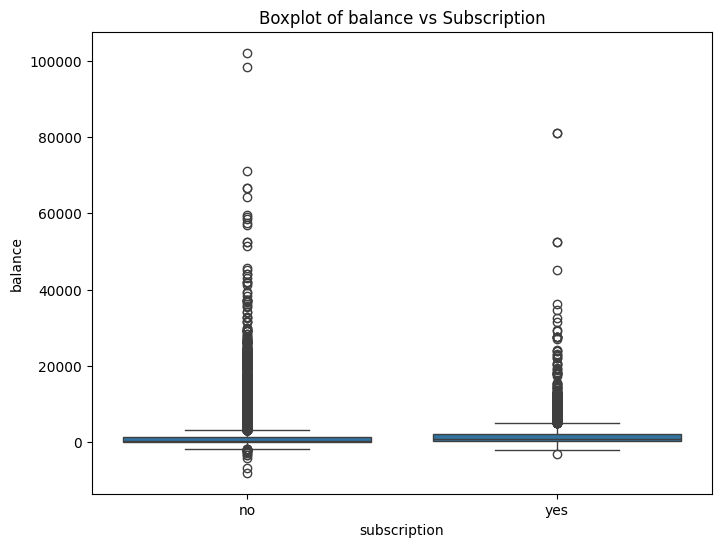

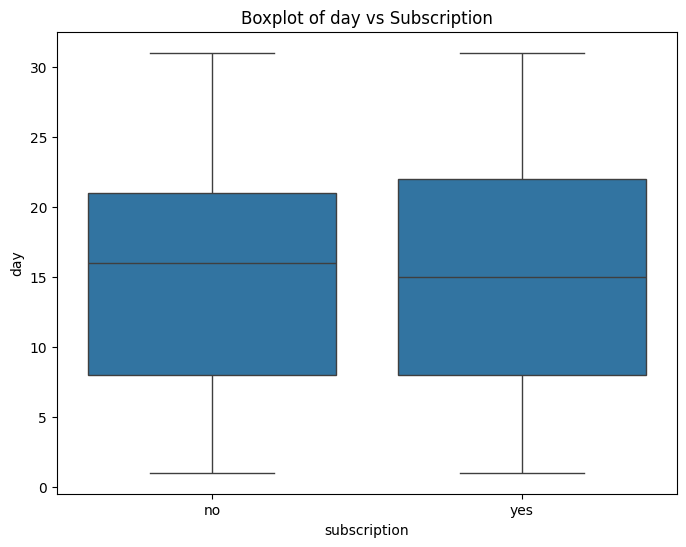

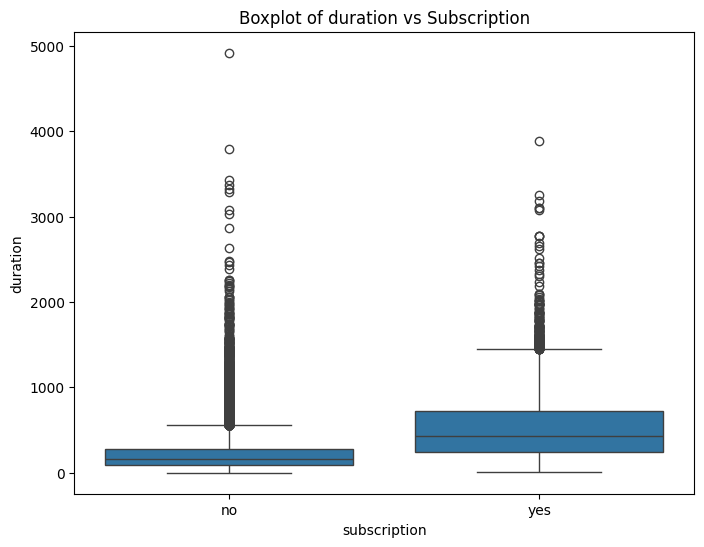

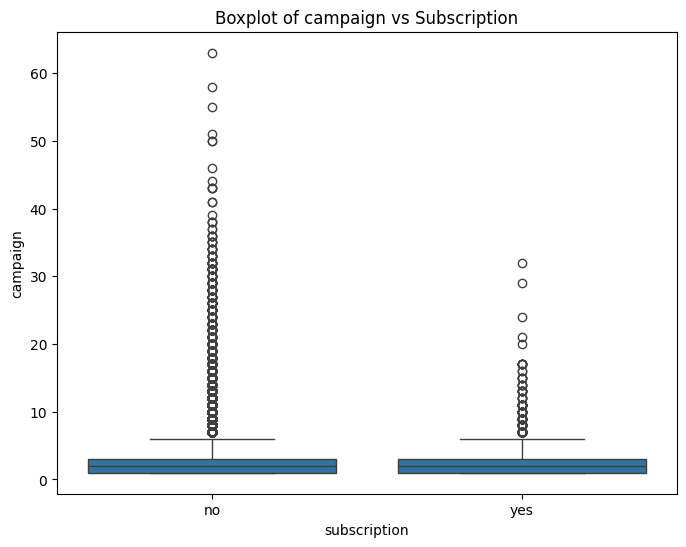

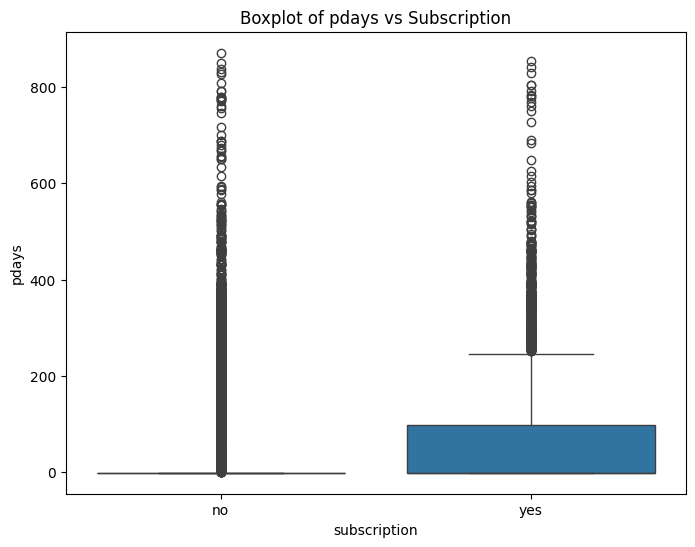

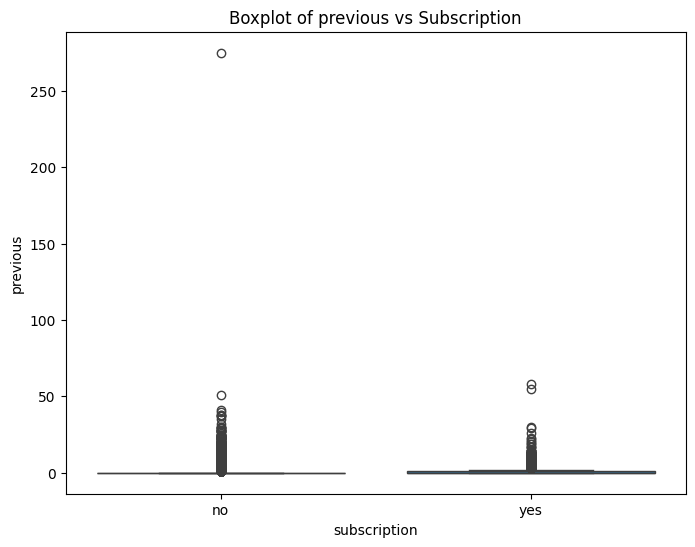

In [ ]:



numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='subscription', y=col, data=df)
    plt.title(f'Boxplot of {col} vs Subscription')
    plt.show()


**Data** **Cleaning**

 **Handling** **Outliers**
"Identifying outliers helps in cleaning the data for better model performance"

 **Calculate** **Q1** (25th **percentile**) **and** **Q3** (75th **percentile**)

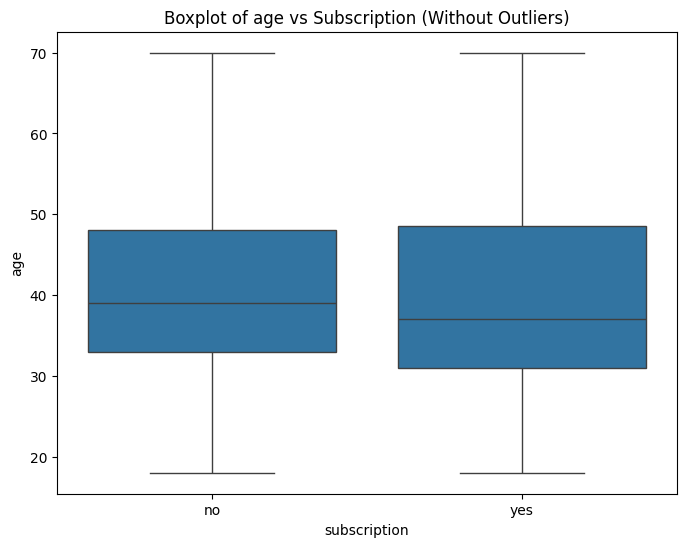

Removed 487 outliers for 'age'



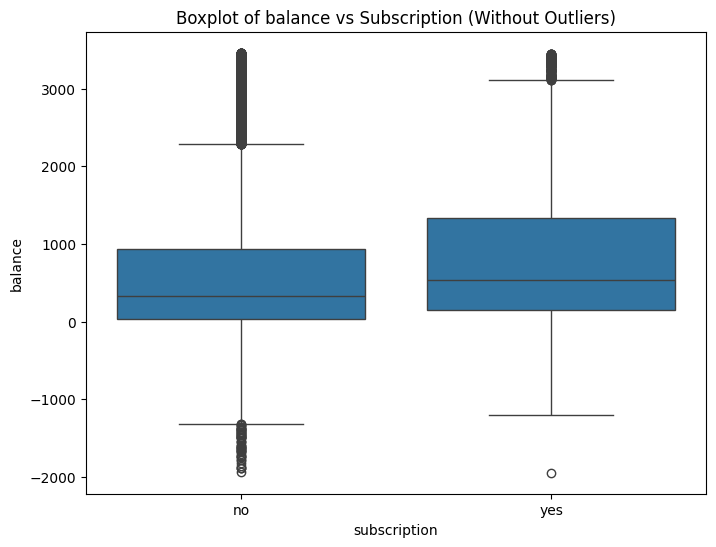

Removed 4729 outliers for 'balance'



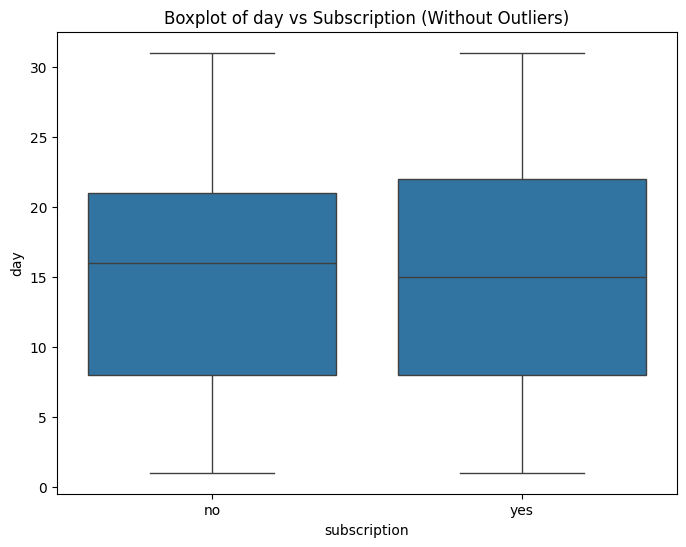

Removed 0 outliers for 'day'



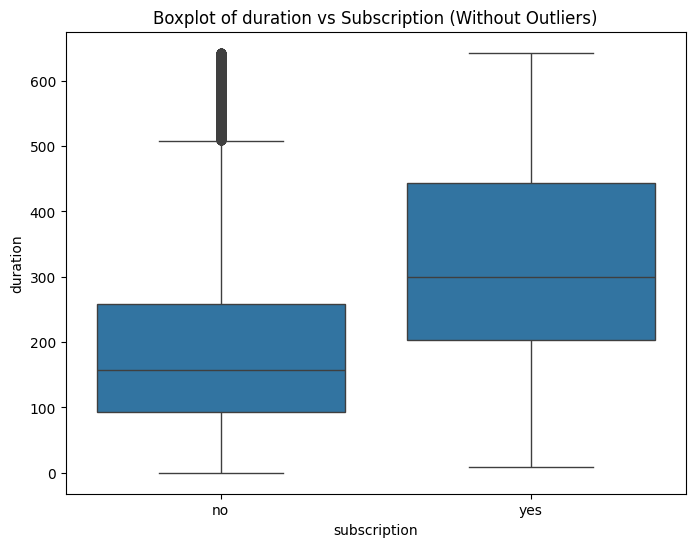

Removed 3235 outliers for 'duration'



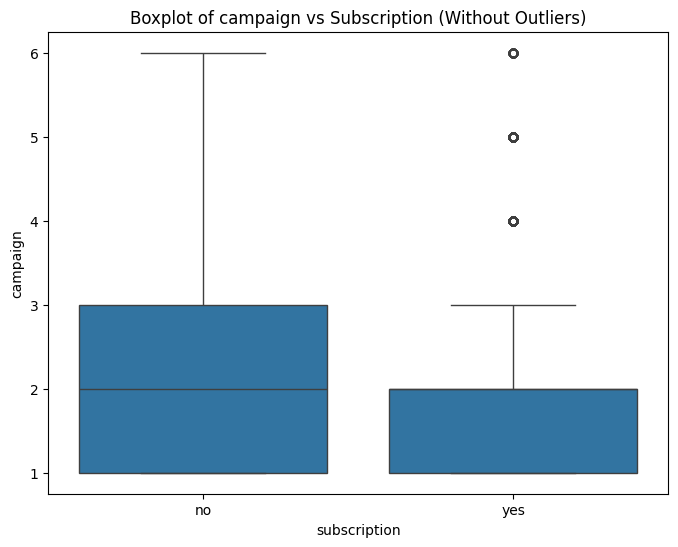

Removed 3064 outliers for 'campaign'



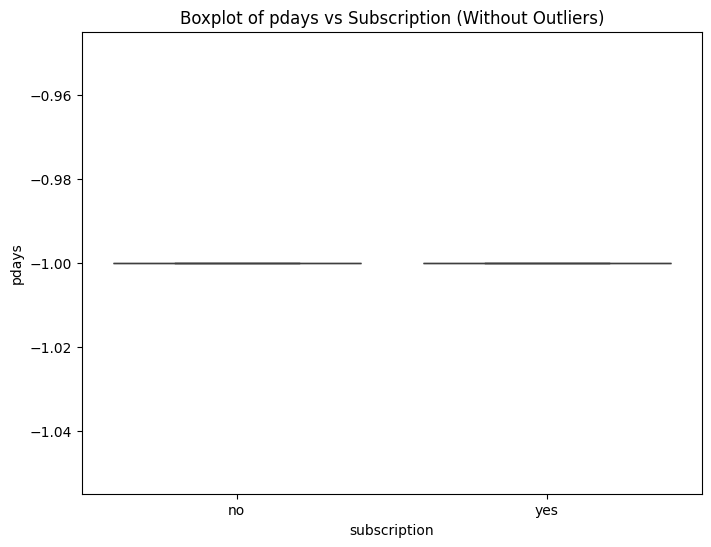

Removed 8257 outliers for 'pdays'



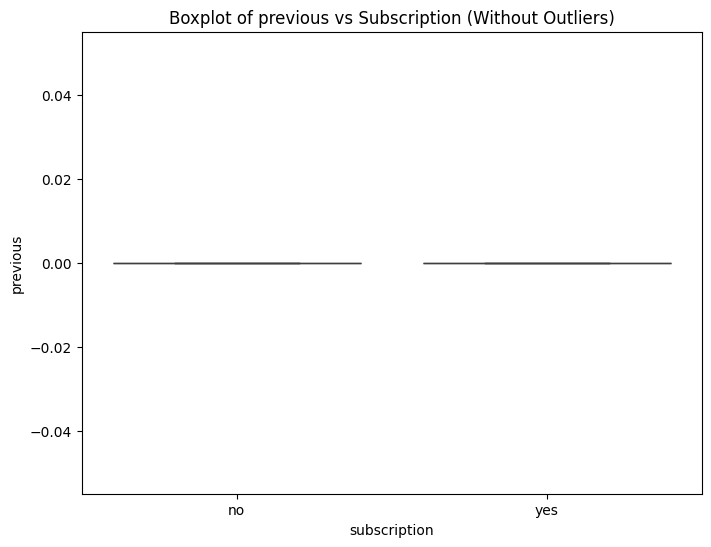

Removed 8257 outliers for 'previous'



In [ ]:


# List of numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Loop through each numerical column to remove outliers and plot

for column in numerical_columns:
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)


    #  Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1


    #  Define the range to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    # Identify and remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



    #  boxplot without outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='subscription', y=column, data=df_no_outliers)
    plt.title(f'Boxplot of {column} vs Subscription (Without Outliers)')
    plt.show()


 #  Print the count of removed outliers
    original_count = df.shape[0]
    new_count = df_no_outliers.shape[0]
    print(f"Removed {original_count - new_count} outliers for '{column}'\n")





**Address** **skewed** **data**

In [ ]:
# Apply the transformation
columns_to_transform = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df.loc[:, columns_to_transform] = np.log1p(df[columns_to_transform])

# Print the transformed columns
print(df[columns_to_transform].head())

        age   balance       day  duration  campaign  pdays  previous
0  4.077537  7.670429  1.791759  5.568345  0.693147   -inf       0.0
1  3.806662  3.401197  1.791759  5.023881  0.693147   -inf       0.0
2  3.526361  1.098612  1.791759  4.343805  0.693147   -inf       0.0
3  3.871201  7.317876  1.791759  4.532599  0.693147   -inf       0.0
4  3.526361  0.693147  1.791759  5.293305  0.693147   -inf       0.0


**Feature** **Engineering**

**categorical** **data** **converterd** **into** **numerical** **data** **using** **labelencoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['subscription'] = le.fit_transform(df['subscription'])

**printing** **the** **first** **10** **rows** **ater** **encodering**

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,4.077537,4,1,2,0,7.670429,1,0,2,1.791759,8,5.568345,0.693147,-inf,0.0,3,0
1,3.806662,9,2,1,0,3.401197,1,0,2,1.791759,8,5.023881,0.693147,-inf,0.0,3,0
2,3.526361,2,1,1,0,1.098612,1,1,2,1.791759,8,4.343805,0.693147,-inf,0.0,3,0
3,3.871201,1,1,3,0,7.317876,1,0,2,1.791759,8,4.532599,0.693147,-inf,0.0,3,0
4,3.526361,11,2,3,0,0.693147,0,0,2,1.791759,8,5.293305,0.693147,-inf,0.0,3,0
5,3.583519,4,1,2,0,5.446737,1,0,2,1.791759,8,4.941642,0.693147,-inf,0.0,3,0
6,3.367296,4,2,2,0,6.104793,1,1,2,1.791759,8,5.384495,0.693147,-inf,0.0,3,0
7,3.761200,2,0,2,1,1.098612,1,0,2,1.791759,8,5.942799,0.693147,-inf,0.0,3,0
8,4.077537,5,1,0,0,4.804021,1,0,2,1.791759,8,3.931826,0.693147,-inf,0.0,3,0
9,3.784190,9,2,1,0,6.386879,1,0,2,1.791759,8,4.025352,0.693147,-inf,0.0,3,0


 **Remove** **rows** **where** **pdays** **contains** -**inf**

In [ ]:

df = df[df['pdays'] != -np.inf]

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
24060,3.526361,0,1,2,0,6.783325,0,0,1,3.091042,10,3.688879,0.693147,5.023881,1.386294,0,0
24062,3.761200,0,2,1,0,NaN,1,1,1,3.091042,10,6.253829,0.693147,5.117994,0.693147,1,1
24064,3.526361,7,1,1,0,8.144679,1,0,1,3.091042,10,4.976734,0.693147,4.521789,1.609438,0,1
24072,3.610918,4,1,2,0,7.789869,1,0,1,3.135494,10,4.304065,0.693147,4.465908,1.609438,1,0
24077,3.610918,4,1,2,0,0.000000,1,0,1,3.178054,10,4.948760,0.693147,4.969813,1.386294,0,1


 **Remove** **all** **rows** **with** **NaN** **values**

In [ ]:

df_cleaned = df.dropna()

df_cleaned.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
24060,3.526361,0,1,2,0,6.783325,0,0,1,3.091042,10,3.688879,0.693147,5.023881,1.386294,0,0
24064,3.526361,7,1,1,0,8.144679,1,0,1,3.091042,10,4.976734,0.693147,4.521789,1.609438,0,1
24072,3.610918,4,1,2,0,7.789869,1,0,1,3.135494,10,4.304065,0.693147,4.465908,1.609438,1,0
24077,3.610918,4,1,2,0,0.000000,1,0,1,3.178054,10,4.948760,0.693147,4.969813,1.386294,0,1
24080,4.043051,9,1,1,0,6.380123,1,0,2,3.178054,10,6.251904,0.693147,4.997212,1.098612,2,1


 **understand** **the** **relationships** **between** **numerical** **variables**

In [ ]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
age,1.000000,-0.038053,-0.444899,-0.114512,-0.027227,0.060639,-0.131946,0.005256,0.146512,-0.000880,0.012569,0.051147,0.010565,-0.072945,0.020894,0.024107,0.045840
job,-0.038053,1.000000,0.072746,0.159280,-0.021012,0.036151,-0.132378,-0.033500,-0.006279,-0.013121,-0.002498,0.036669,-0.013382,-0.089167,0.008642,0.066642,0.081239
marital,-0.444899,0.072746,1.000000,0.121688,-0.005632,0.017929,-0.056963,-0.055435,-0.031866,0.011821,-0.024130,-0.009108,-0.012987,-0.019807,-0.001184,0.045015,0.049234
education,-0.114512,0.159280,0.121688,1.000000,-0.013682,0.058314,-0.129804,-0.047718,-0.048456,-0.010333,-0.010829,0.011042,-0.031315,-0.130481,-0.005522,0.082852,0.108098
default,-0.027227,-0.021012,-0.005632,-0.013682,1.000000,-0.055612,0.022644,0.052261,-0.019834,0.001413,0.020123,-0.017052,-0.001683,0.034216,0.007903,-0.025566,-0.028299
balance,0.060639,0.036151,0.017929,0.058314,-0.055612,1.000000,-0.093069,-0.084966,0.011195,0.063315,0.003454,0.057646,-0.003244,-0.047836,0.015033,0.056573,0.069927
housing,-0.131946,-0.132378,-0.056963,-0.129804,0.022644,-0.093069,1.000000,0.109815,-0.069869,-0.013472,0.014452,-0.128533,0.065744,0.307202,-0.013585,-0.284439,-0.317501
loan,0.005256,-0.033500,-0.055435,-0.047718,0.052261,-0.084966,0.109815,1.000000,-0.020904,0.001207,0.000524,-0.029668,0.009734,0.029374,0.013958,-0.103154,-0.115805
contact,0.146512,-0.006279,-0.031866,-0.048456,-0.019834,0.011195,-0.069869,-0.020904,1.000000,-0.015391,0.047045,-0.118919,0.055948,0.019957,0.060738,0.024590,-0.014321
day,-0.000880,-0.013121,0.011821,-0.010333,0.001413,0.063315,-0.013472,0.001207,-0.015391,1.000000,0.035223,-0.023041,-0.004526,0.005921,-0.008654,-0.002691,0.011602




***correlation*** ***heatmap***

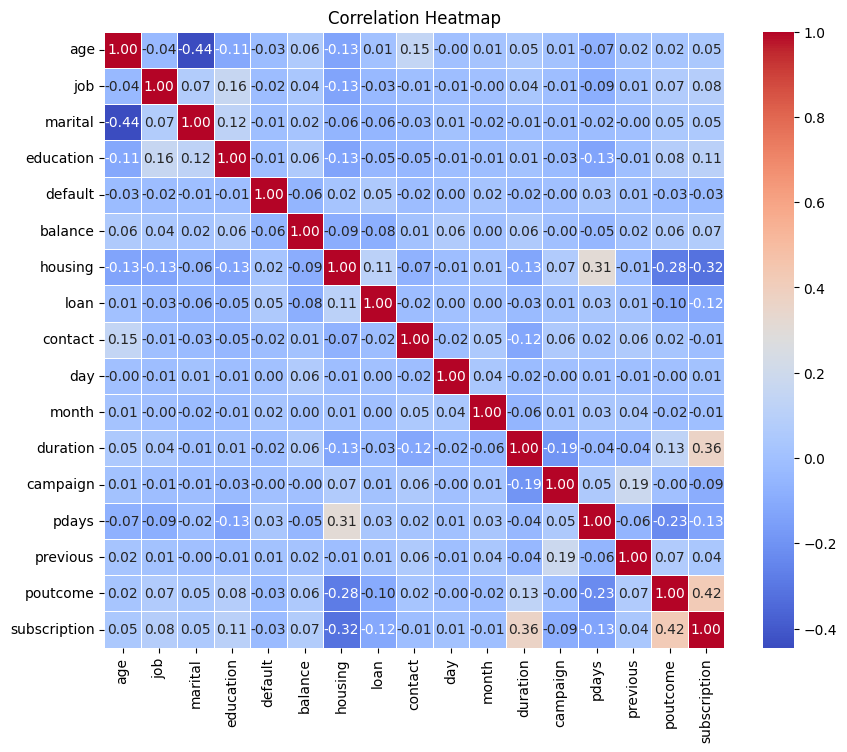

In [ ]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**observations**

Diagonal Elements

    The diagonal elements represent the correlation of each variable with
    
    itself, which is always 1.0. That's why they are all dark red in the heatmap.


Correlation Coefficient

    The numbers inside the cells represent the correlation coefficient between two variables. The closer the value is to:

    1: Strong positive correlation (if one increases, the other increases).

    0: No correlation (variables are independent of each other).

    -1: Strong negative correlation (if one increases, the other decreases)

 Color Scheme:
   
    red shades indicate positive correlations. The deeper the red, the stronger the positive correlation.

    Blue shades indicate negative correlations. The deeper the blue, the stronger the negative correlation.


    light color indicate weak or near-zero correlations, meaning these variables have little to no linear relationship.


insights



poutcome vs. pdays:

    Correlation value of 0.86, which indicates a strong positive correlation
    
    This implies that as pdays (the number of days since the client was last
    
    contacted) increases, the outcome of the previous marketing campaign (poutcome) is also likely to have a positive outcome.


 previous vs. poutcome:

    Correlation value of 0.49, which is a moderate positive correlation.

    The more contacts the client had before this campaign (previous),

    the more likely the outcome of the campaign (poutcome) will be positive.


contact vs. loan

    Correlation value of 0.36, which suggests that there's a moderate positive
    
    correlation between the type of communication (contact) and whether the

    client has a loan.
    
    This could mean that the way clients are contacted
    influences their likelihood of having a loan.

duration vs. balance

    A small positive correlation (0.08).
    
    This suggests that there is only a weak relationship between the balance in
    
    the bank and the duration of a call with the client.


 Low Correlation with Subscription

    Most of the variables seem to have very low correlation values with subscription

**pair** **plot**

 ***understanding*** ***the*** ***relationship*** ***between*** ***different*** ***variables***

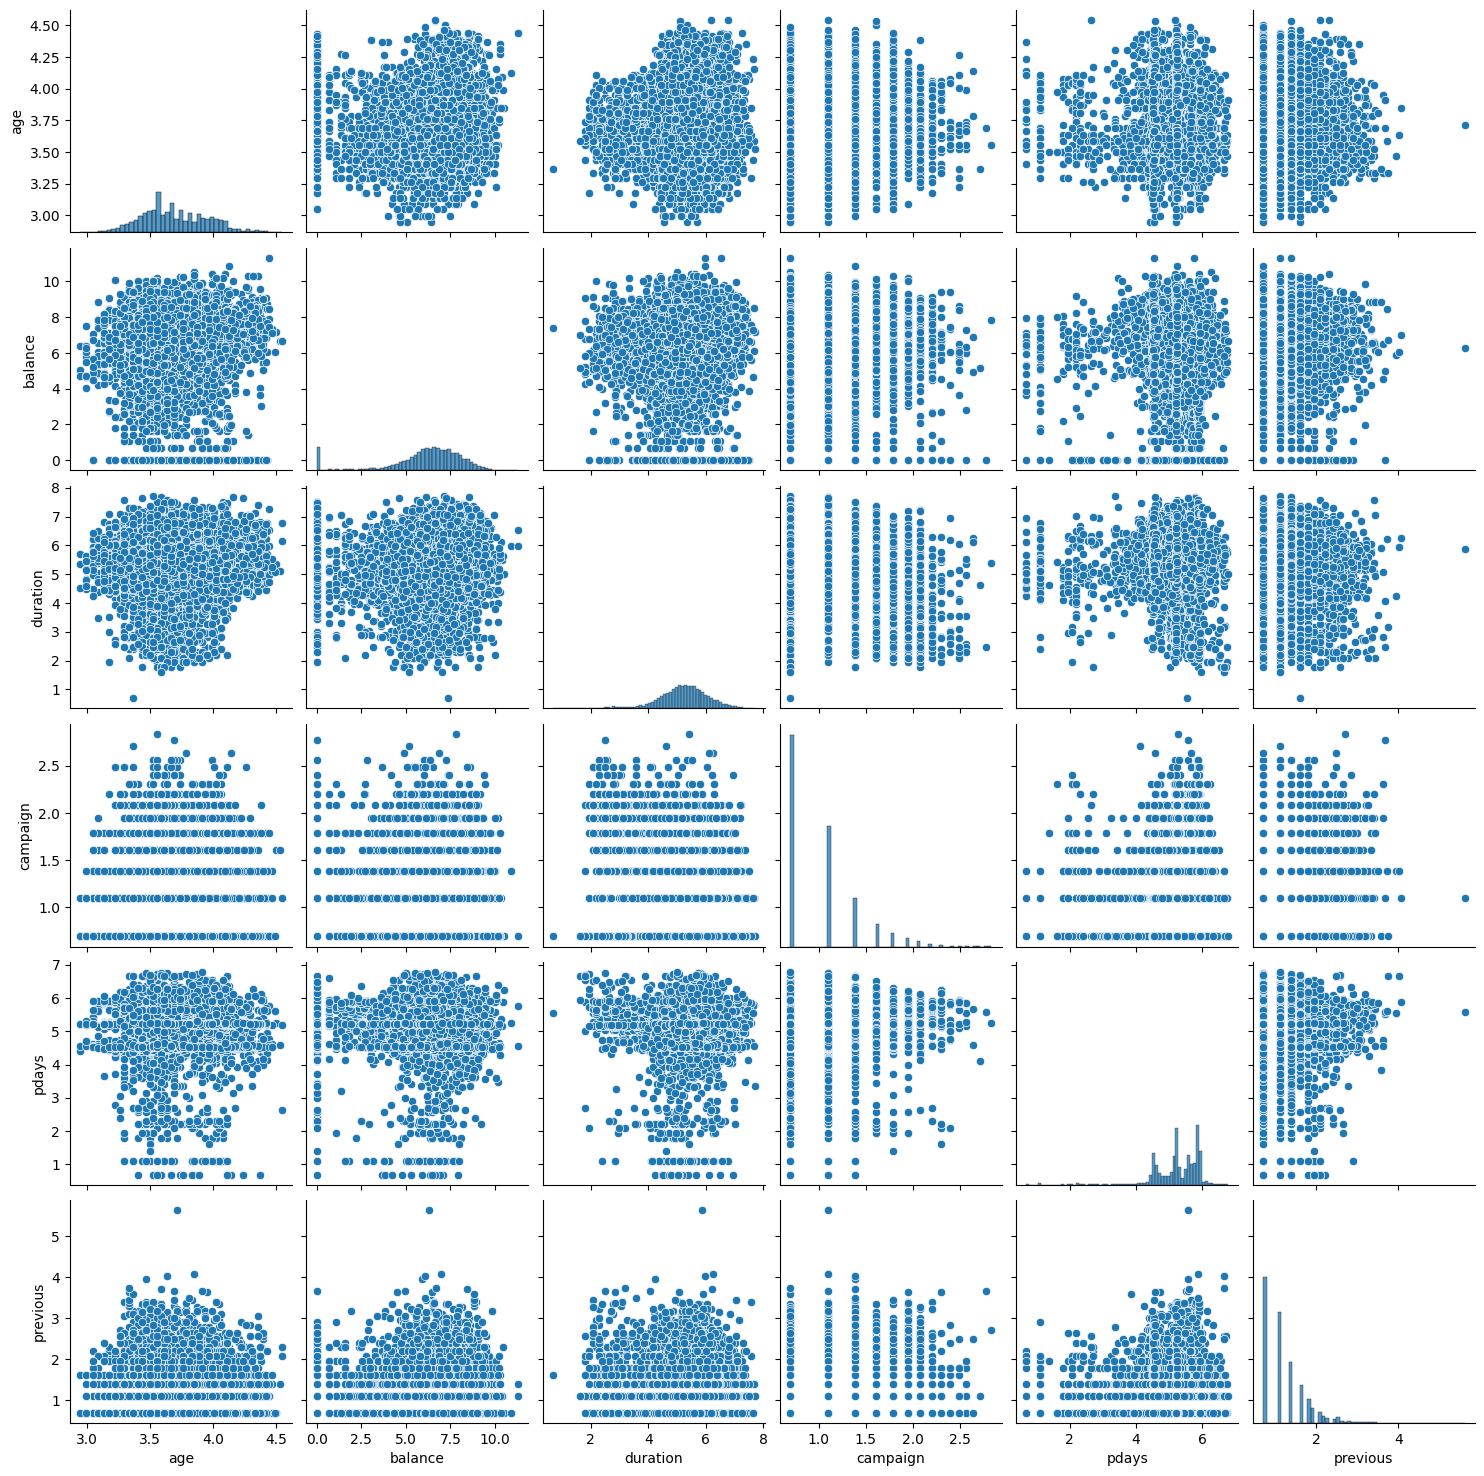

In [ ]:
# Select only numerical columns for the pair plot
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot
sns.pairplot(df[numerical_cols])
plt.show()


**Age**

    majority of clients are in the range of 20 to 60, with a spike around the middle-aged group.

**Balance**

    The distribution is heavily skewed toward lower balances, with a few
    
    clients having very high balances, which indicates the presence of outliers.


**Day**

    The day variable (which could refer to the day of the month) is uniformly
    
    distributed, meaning calls were likely made equally across different days.


**Duration**

    
    
    Most calls have a short duration, with a few outliers reaching very high durations


**Campaign**

    Most customers have been contacted only a few times, with the majority

    receiving fewer than 10 calls.


**Pdays**:

    Many of the values are clustered at 0, suggesting that many customers were
    
    either not contacted previously or the time since their last contact was too long to record.


**Previous**

    Similar to pdays, most customers were not contacted before, as indicated by the large number of zeros.

**Split** **Data** **into** **Training** **and** **Testing** **Sets**

In [ ]:

X = df.drop(columns='subscription')  # Drop the target column from the DataFrame to get features

y = df['subscription']  # Assign the target variable

# split the data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successful!")



Data split successful!


**Feature** **Selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif


 **Random** **Forest** **for** **Feature** **Importance**

 **Define** **feature** **matrix** **X** **and** **target** **variable** **y**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Handle missing and infinite values

X = df.drop('subscription', axis=1)  # Replace 'subscription' with the actual target column name
y = df['subscription']

# Replace infinite values with NaN and then impute missing values

X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_imputed, y)

# Get feature importance scores
importance = rf.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance_df)


      Feature  Importance
11   duration    0.214144
15   poutcome    0.156553
13      pdays    0.119653
5     balance    0.080893
0         age    0.075303
9         day    0.071680
10      month    0.065144
6     housing    0.050667
14   previous    0.040913
1         job    0.040587
12   campaign    0.026712
3   education    0.021757
2     marital    0.018183
7        loan    0.009006
8     contact    0.007843
4     default    0.000963


**barplot** **with** **seaborn** **to** **visualize** **the** **feature** **importance**


<Axes: xlabel='Importance', ylabel='Feature'>

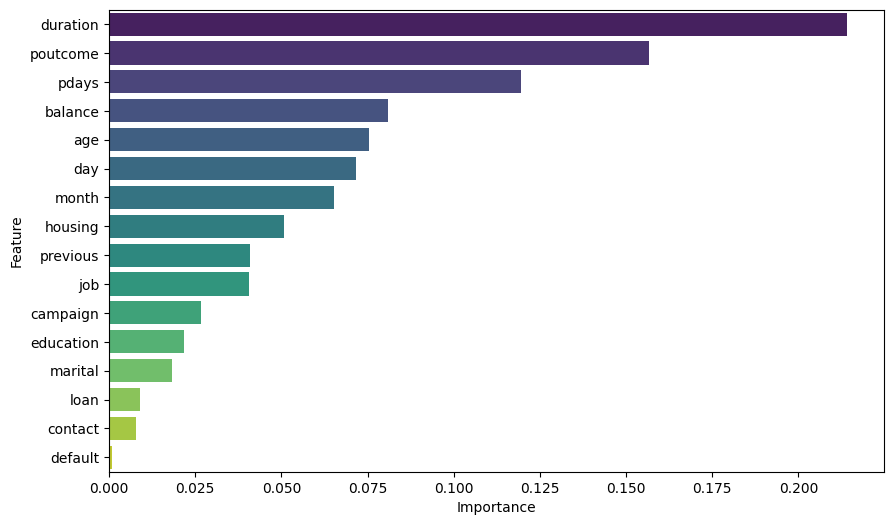

In [ ]:
plt.figure(figsize=(10, 6))


sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

**Select** **KBest**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer



X = df.drop('subscription', axis=1)
y = df['subscription']

# Replace infinite values with NaN and convert non-numeric values to NaN

X = X.apply(pd.to_numeric, errors='coerce')
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values using SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature Selection using SelectKBest
k = 10  # Number of top features to select

selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_imputed, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

#  Get the feature scores
feature_scores = selector.scores_

#  Create a DataFrame to display the scores of all features
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df['Selected'] = feature_scores_df['Feature'].isin(selected_features)

# Filter the DataFrame to show only selected features
selected_feature_scores_df = feature_scores_df[feature_scores_df['Selected']]

# Sort by scores for better readability
selected_feature_scores_df = selected_feature_scores_df.sort_values(by='Score', ascending=False)

# Print the selected features with their scores
print("Top Features Selected by SelectKBest with their Scores:")
print(selected_feature_scores_df[['Feature', 'Score']])


Top Features Selected by SelectKBest with their Scores:
      Feature        Score
15   poutcome  1773.383857
11   duration  1249.601081
6     housing   925.449638
13      pdays   141.144048
7        loan   112.211718
3   education    97.601358
12   campaign    68.082429
1         job    54.843624
5     balance    39.252506
2     marital    20.058755


**Plot** **the** **feature** **scores**

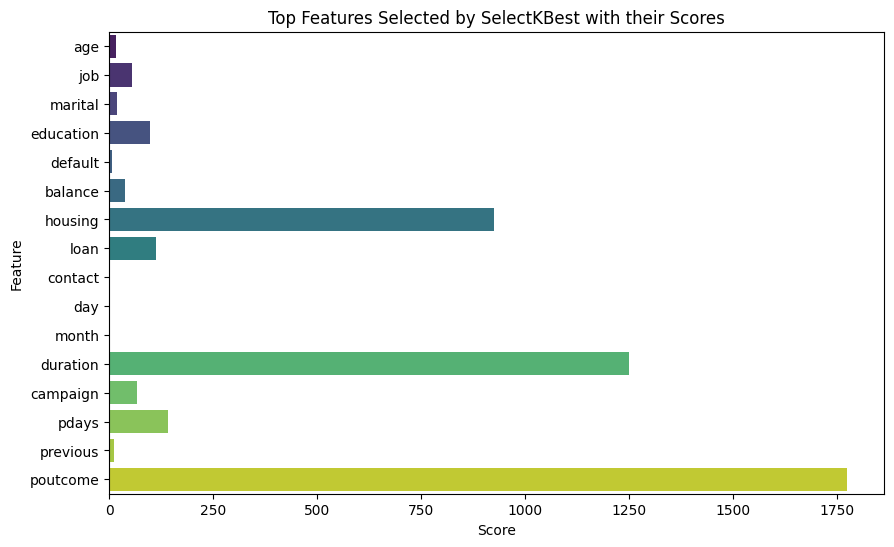

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis')
plt.title('Top Features Selected by SelectKBest with their Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

**Feature** **Scaling**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

def handle_infinite_values(df):
    """Replace infinite values with NaN and drop rows with NaN values."""
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    return df

def handle_extreme_values(df, threshold=1e300):
    """Clip extreme values to a specified threshold."""
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df[col] = df[col].clip(-threshold, threshold)
    return df

def scale_data(df, method='standard', columns_to_scale=None):
    """
    Scale the specified columns of a dataframe using the chosen method.

    Parameters:
    df (pandas.DataFrame): The dataframe to scale
    method (str): The scaling method to use ('standard', 'minmax', or 'robust')
    columns_to_scale (list): List of column names to scale. If None, all numeric columns will be scaled.

    Returns:
    pandas.DataFrame: The scaled dataframe
    """
    # Handle infinite and extreme values
    df = handle_infinite_values(df)
    df = handle_extreme_values(df)

    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns

    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaling method. Choose 'standard', 'minmax', or 'robust'.")

    ct = ColumnTransformer([('scaler', scaler, columns_to_scale)], remainder='passthrough')
    scaled_array = ct.fit_transform(df)

    scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale.tolist() + [col for col in df.columns if col not in columns_to_scale])
    return scaled_df

# Example usage:
# Assuming 'df' is your pandas DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data

# Print original data summary
print("Original data summary:")
print(df.describe())

# Scale the data
scaled_df = scale_data(df, method='standard')

# Print scaled data summary
print("\nScaled data summary:")
print(scaled_df.describe())


Original data summary:
               age          job      marital    education      default  \
count  8257.000000  8257.000000  8257.000000  8257.000000  8257.000000   
mean      3.702123     4.329175     1.199830     1.276856     0.006903   
std       0.259212     3.255424     0.620847     0.724962     0.082803   
min       2.944439     0.000000     0.000000     0.000000     0.000000   
25%       3.526361     1.000000     1.000000     1.000000     0.000000   
50%       3.663562     4.000000     1.000000     1.000000     0.000000   
75%       3.891820     7.000000     2.000000     2.000000     0.000000   
max       4.543295    11.000000     2.000000     3.000000     1.000000   

           balance      housing         loan      contact          day  \
count  7775.000000  8257.000000  8257.000000  8257.000000  8257.000000   
mean          -inf     0.622744     0.136006     0.093375     2.552157   
std            NaN     0.484729     0.342815     0.318785     0.649377   
min           

**bulid** **and** **evaluation** **of** **model** **allso** **find** **the** **best** **model**

Logistic Regression Accuracy: 0.8282
Logistic Regression Precision: 0.6756
Logistic Regression Recall: 0.5430
Logistic Regression F1-Score: 0.6021


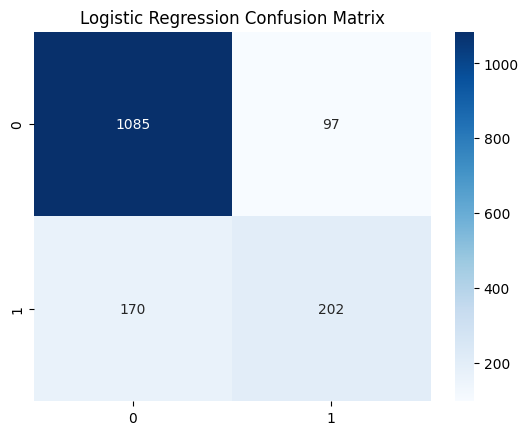

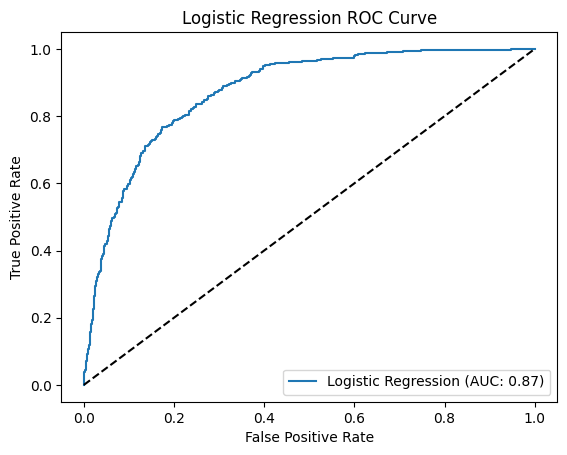

Logistic Regression Cross-Validation Accuracy: 0.8349
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1182
           1       0.68      0.54      0.60       372

    accuracy                           0.83      1554
   macro avg       0.77      0.73      0.75      1554
weighted avg       0.82      0.83      0.82      1554

SVM Accuracy: 0.8301
SVM Precision: 0.6942
SVM Recall: 0.5188
SVM F1-Score: 0.5938


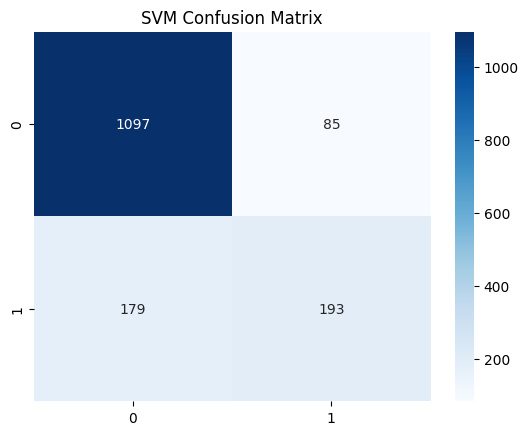

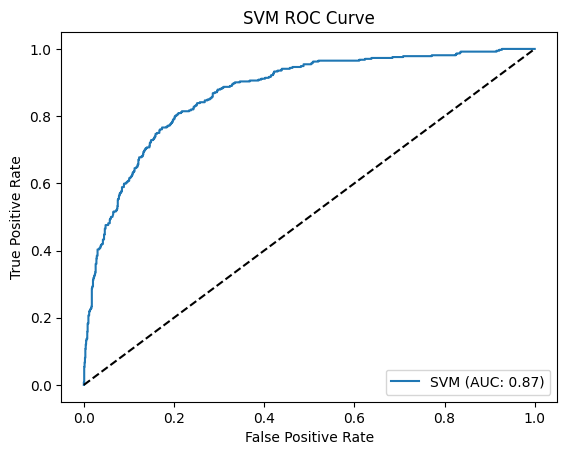

SVM Cross-Validation Accuracy: 0.8320
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1182
           1       0.69      0.52      0.59       372

    accuracy                           0.83      1554
   macro avg       0.78      0.72      0.74      1554
weighted avg       0.82      0.83      0.82      1554

Random Forest Accuracy: 0.8552
Random Forest Precision: 0.7304
Random Forest Recall: 0.6263
Random Forest F1-Score: 0.6744


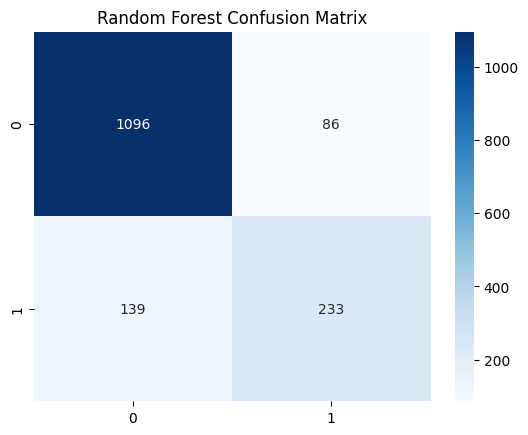

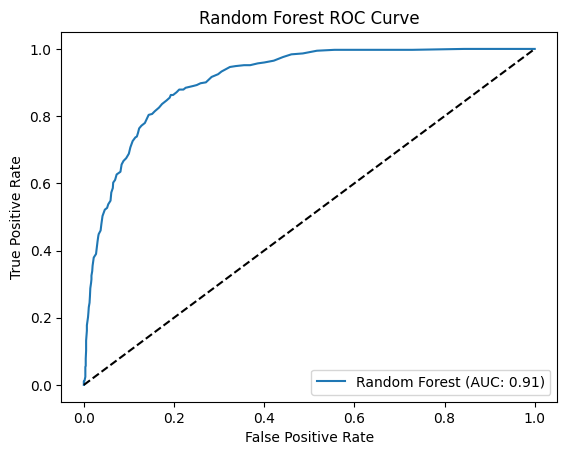

Random Forest Cross-Validation Accuracy: 0.8414
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1182
           1       0.73      0.63      0.67       372

    accuracy                           0.86      1554
   macro avg       0.81      0.78      0.79      1554
weighted avg       0.85      0.86      0.85      1554

KNN Accuracy: 0.8108
KNN Precision: 0.6345
KNN Recall: 0.4946
KNN F1-Score: 0.5559


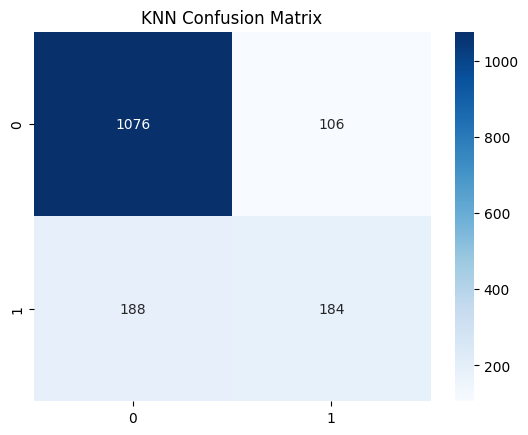

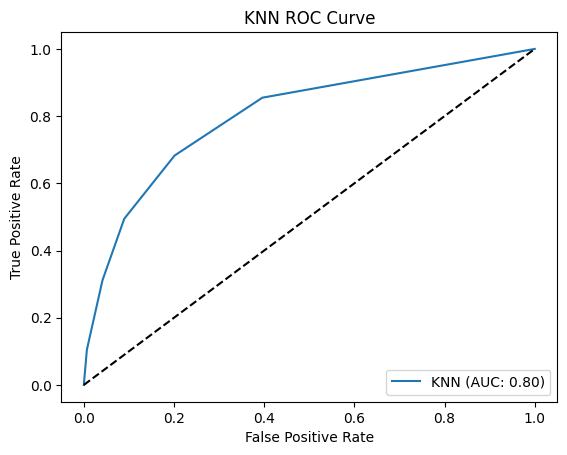

KNN Cross-Validation Accuracy: 0.8085
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1182
           1       0.63      0.49      0.56       372

    accuracy                           0.81      1554
   macro avg       0.74      0.70      0.72      1554
weighted avg       0.80      0.81      0.80      1554

Naive Bayes Accuracy: 0.7799
Naive Bayes Precision: 0.5298
Naive Bayes Recall: 0.7177
Naive Bayes F1-Score: 0.6096


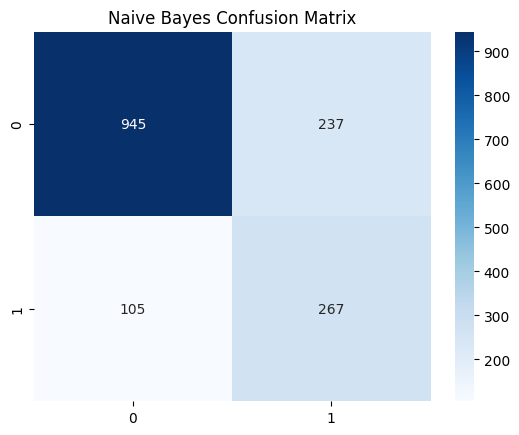

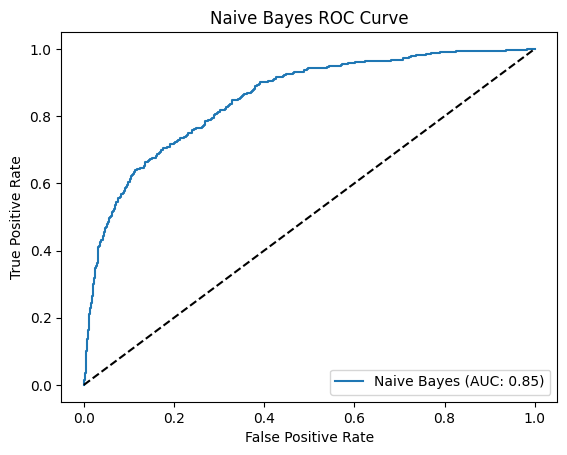

Naive Bayes Cross-Validation Accuracy: 0.7881
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1182
           1       0.53      0.72      0.61       372

    accuracy                           0.78      1554
   macro avg       0.71      0.76      0.73      1554
weighted avg       0.81      0.78      0.79      1554

Best Model: RandomForestClassifier(random_state=0)
Best Model Accuracy: 0.8552
Best Model Precision: 0.7304
Best Model Recall: 0.6263
Best Model F1-Score: 0.6744
Best Model Cross-Validation Accuracy: 0.8414


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer


# Assuming df is your DataFrame and 'subscription' is the target variable
y = df['subscription']  # Adjust according to your target variable
X = df.drop('subscription', axis=1)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize models
log_model = LogisticRegression(random_state=0)
svm_model = SVC(probability=True, random_state=0)
rf_model = RandomForestClassifier(random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()  # Naive Bayes

# Define a function to train and evaluate models
def evaluate_model(model, model_name):
   model.fit(X_train_scaled, y_train)
   y_pred = model.predict(X_test_scaled)
   y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Needed for ROC curve

   # Calculate classification metrics
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   recall = recall_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)

   print(f'{model_name} Accuracy: {accuracy:.4f}')
   print(f'{model_name} Precision: {precision:.4f}')
   print(f'{model_name} Recall: {recall:.4f}')
   print(f'{model_name} F1-Score: {f1:.4f}')

   # Confusion matrix
   cm = confusion_matrix(y_test, y_pred)
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title(f'{model_name} Confusion Matrix')
   plt.show()

   # ROC Curve
   fpr, tpr, _ = roc_curve(y_test, y_prob)
   roc_auc = roc_auc_score(y_test, y_prob)
   plt.plot(fpr, tpr, label=f'{model_name} (AUC: {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(f'{model_name} ROC Curve')
   plt.legend(loc='lower right')
   plt.show()

   # Cross-validation
   model_cv = cross_val_score(model, X_train_scaled, y_train, cv=5)
   print(f'{model_name} Cross-Validation Accuracy: {model_cv.mean():.4f}')

   # Print classification report
   print(f'Classification Report for {model_name}:\n')
   print(classification_report(y_test, y_pred))

   return {
      'model': model,
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1': f1,
      'cross_val_accuracy': model_cv.mean()
   }

# Evaluate models
models = [
   evaluate_model(log_model, "Logistic Regression"),
   evaluate_model(svm_model, "SVM"),
   evaluate_model(rf_model, "Random Forest"),
   evaluate_model(knn_model, "KNN"),
   evaluate_model(nb_model, "Naive Bayes")
]

# Find the best model based on a specified metric
def find_best_model(models, metric):
   best_model = max(models, key=lambda x: x[metric])
   return best_model

best_model = find_best_model(models, 'accuracy')
print(f'Best Model: {best_model["model"]}')
print(f'Best Model Accuracy: {best_model["accuracy"]:.4f}')
print(f'Best Model Precision: {best_model["precision"]:.4f}')
print(f'Best Model Recall: {best_model["recall"]:.4f}')
print(f'Best Model F1-Score: {best_model["f1"]:.4f}')
print(f'Best Model Cross-Validation Accuracy: {best_model["cross_val_accuracy"]:.4f}')


**Define** **hyperparameter** **tuning** **space**

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define hyperparameter tuning space
param_grid_log = {
  'C': [0.1, 1, 10],
  'penalty': ['l1', 'l2']
}

param_grid_svm = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'rbf', 'poly']
}

param_grid_rf = {
  'n_estimators': [10, 50, 100],
  'max_depth': [None, 5, 10]
}

param_grid_knn = {
  'n_neighbors': [3, 5, 10]
}

param_grid_nb = {
  'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform hyperparameter tuning
grid_log = GridSearchCV(log_model, param_grid_log, cv=5, scoring='accuracy')
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')

grid_log.fit(X_train_scaled, y_train)
grid_svm.fit(X_train_scaled, y_train)
grid_rf.fit(X_train_scaled, y_train)
grid_knn.fit(X_train_scaled, y_train)
grid_nb.fit(X_train_scaled, y_train)

# Print the results
print("Best Parameters:")
print("Logistic Regression:", grid_log.best_params_)
print("SVM:", grid_svm.best_params_)
print("Random Forest:", grid_rf.best_params_)
print("KNN:", grid_knn.best_params_)
print("Naive Bayes:", grid_nb.best_params_)

print("\nBest Scores:")
print("Logistic Regression:", grid_log.best_score_)
print("SVM:", grid_svm.best_score_)
print("Random Forest:", grid_rf.best_score_)
print("KNN:", grid_knn.best_score_)
print("Naive Bayes:", grid_nb.best_score_)

Best Parameters:
Logistic Regression: {'C': 10, 'penalty': 'l2'}
SVM: {'C': 10, 'kernel': 'linear'}
Random Forest: {'max_depth': 10, 'n_estimators': 100}
KNN: {'n_neighbors': 10}
Naive Bayes: {'var_smoothing': 1e-09}

Best Scores:
Logistic Regression: 0.8352373290426389
SVM: 0.8341110217216411
Random Forest: 0.8463395012067579
KNN: 0.8149637972646822
Naive Bayes: 0.7880933226065969


**Hyperparameter** **Tuning** **Results**

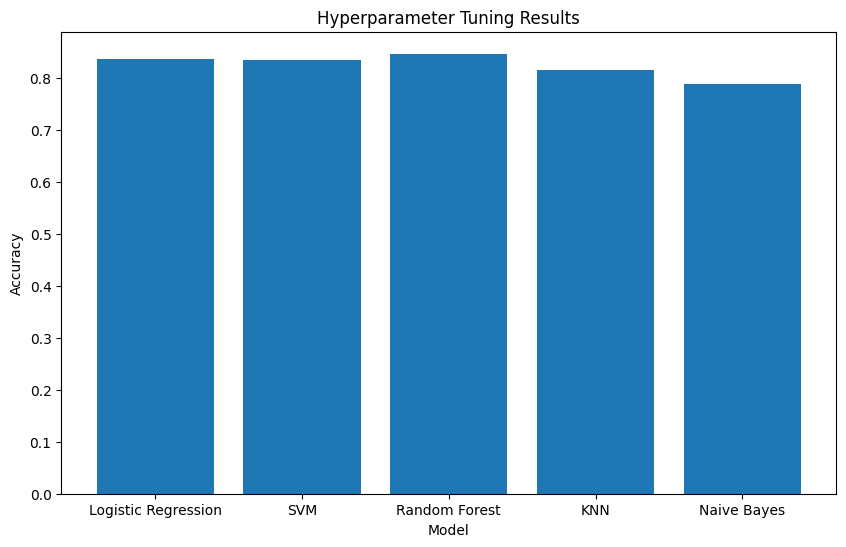

In [74]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Naive Bayes'], [grid_log.best_score_, grid_svm.best_score_, grid_rf.best_score_, grid_knn.best_score_, grid_nb.best_score_])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.show()

 **Save** **the** **Model**

In [75]:

import pickle

with open('best_model.pkl', 'wb') as f:
   pickle.dump(best_model, f)


 **Test** **with** **Unseen** **Data**

In [77]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = grid_log.best_estimator_.predict(X_test_scaled)
print("Accuracy on Unseen Data:", accuracy_score(y_test, y_pred))
print("Classification Report on Unseen Data:\n", classification_report(y_test, y_pred))
print("Confusion Matrix on Unseen Data:\n", confusion_matrix(y_test, y_pred))

Accuracy on Unseen Data: 0.8281853281853282
Classification Report on Unseen Data:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1182
           1       0.68      0.54      0.60       372

    accuracy                           0.83      1554
   macro avg       0.77      0.73      0.75      1554
weighted avg       0.82      0.83      0.82      1554

Confusion Matrix on Unseen Data:
 [[1085   97]
 [ 170  202]]


**Interpretation** **of** **Results** (Conclusion)

In [78]:

print("The best model is:", grid_log.best_estimator_)
print("The accuracy of the best model on the training data is:", grid_log.best_score_)
print("The accuracy of the best model on the unseen data is:", accuracy_score(y_test, y_pred))

The best model is: LogisticRegression(C=10, random_state=0)
The accuracy of the best model on the training data is: 0.8352373290426389
The accuracy of the best model on the unseen data is: 0.8281853281853282


**Future** **Work**

In [79]:

print("Future work includes exploring deep learning algorithms for potentially higher accuracy.")
print("The model should be updated periodically with new data to maintain its performance.")
print("Addressing imbalanced data through resampling techniques could improve the model's performance.")
print("Adding more features to the dataset could enhance the model's predictive power.")

Future work includes exploring deep learning algorithms for potentially higher accuracy.
The model should be updated periodically with new data to maintain its performance.
Addressing imbalanced data through resampling techniques could improve the model's performance.
Adding more features to the dataset could enhance the model's predictive power.
